In [719]:
import os
import datetime
import mplcursors
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [720]:
# Diretório onde estão os arquivos .csv
diretorio = 'C:\\Users\\matheus.moreira\\master-thesis\\dataset-samples'

# Lista para armazenar os DataFrames de cada arquivo
dataframes = []

# Percorre os arquivos no diretório
for arquivo in os.listdir(diretorio):
    if arquivo.endswith('.csv'):  # Verifica se o arquivo é um arquivo .csv
        # Caminho completo do arquivo
        caminho_arquivo = os.path.join(diretorio, arquivo)
        
        # Carrega o arquivo .csv em um DataFrame
        df = pd.read_csv(caminho_arquivo)
        
        # Adiciona o DataFrame à lista
        dataframes.append(df)

# Concatena todos os DataFrames da lista em um único DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [721]:
# Lista das colunas que você deseja descartar
colunas_descartadas = [
    'id_sm', 'samplenumber', 'lotnumber', 'binnumber', 'partnumber', 
    'turnsratio', 'highdcbusvoltage', 'avgdcbusvoltage', 'lowdcbusvoltage', 'highprimarycurrent', 
    'lowprimarycurrent', 'highsecondarycurrent', 
    'lowsecondarycurrent', 'cfactor', 'percentheatorcurrent', 'targetcurrent', 'steppernumber', 
    'totalweldcount', 'stepweldcount', 'spotid', 'contactor', 'avgontime', 
    'hifreqcyclecount', 'weldstatus', 'faultcode', 'alertcode', 'raftmode', 'rd', 're', 'rp', 
    'estthickness', 'toolinteg',  'resistance_data', 'current_data', 'heat_data', 'energy_data', 
    'station', 'stack', 'ipaddress',
    'processinteg', 'nuggetinteg', 'refrd', 'refrp', 'refenergy', 'refheat', 'progthickness', 
    'masteroffset', 'weightone', 'weighttwo', 'weightthree', 'risetime', 'ressumb', 'ressumc', 
    'ressumd', 'wqim', 'wqio', 'expcycle', 'wslide', 'percentsat', 'learnedi', 'preheattime', 
    'vspotid_sm', 'current_data_sm', 'resistance_data_sm', 'energy_data_sm', 'heat_data_sm', 
    'id_gr', 'fk_weld_id', 'record_id', 'timestamp_gr', 'summarydataformat', 'cycledataformat', 
    'cycledataresolution', 'summary_data', 'current_data_gr', 'resistance_data_gr', 'energy_data_gr', 
    'heat_data_gr', 'Unnamed: 0', 'short_tag', 'extended_notes', 'vspotid_gr', 'weld_type'
]

# Verifica se as colunas estão presentes no DataFrame antes de tentar removê-las
colunas_presentes = [coluna for coluna in colunas_descartadas if coluna in df.columns]

# Descarta as colunas presentes no DataFrame
df = df.drop(columns=colunas_presentes)

In [722]:
# Definir os tipos de dados desejados para cada coluna
tipos_de_dados = {
    'stackup': 'string',
    'spot_id': 'string',
    'sequencenumber': 'int64',
    'timestamp_sm': 'datetime64[ns]',
    'avgresistance': 'int64', 
    'avgsecvoltage': 'int64', 
    'totalenergy': 'int64', 
    'totalheat': 'int64',
    'stepnumber': 'int64',
    'avgprimarycurrent':'int64', 
    'avgsecondarycurrent':'int64', 
}

# Define os tipos de dados das colunas no DataFrame
df_final = df.astype(tipos_de_dados)

# Preencher os valores da coluna stackup com base no valor da coluna stepnumber
df_final['stackup'] = df_final.apply(lambda row: 'EMPTY' if pd.isna(row['stackup']) and row['stepnumber'] == 0 else row['stackup'], axis=1)
df_final['stackup'] = df_final['stackup'].fillna('MISSING STACKUP')

# Verifica os tipos de dados das colunas após a conversão
df_final.head()

,timestamp_sm,sequencenumber,avgprimarycurrent,avgsecondarycurrent,stepnumber,avgresistance,avgsecvoltage,totalenergy,totalheat,spot_id,stackup
0,2024-03-28 14:27:17.813410,3,681,36790,2,84,316,1361,5028,20YD176,2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW1...
1,2024-03-28 14:27:16.473364,2,611,33021,2,83,279,1092,43664,20YD175,2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW1...
2,2024-03-28 14:27:13.429987,4,685,37000,2,80,303,1322,1128,20YD178,2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW1...
3,2024-03-28 14:27:09.806069,6,608,32842,2,79,262,855,41339,20YD184,2 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW1...
4,2024-03-28 14:27:06.392015,5,644,34826,2,78,278,961,54589,20YD183,2 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW1...


In [723]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp_sm         8782 non-null   datetime64[ns]
 1   sequencenumber       8782 non-null   int64         
 2   avgprimarycurrent    8782 non-null   int64         
 3   avgsecondarycurrent  8782 non-null   int64         
 4   stepnumber           8782 non-null   int64         
 5   avgresistance        8782 non-null   int64         
 6   avgsecvoltage        8782 non-null   int64         
 7   totalenergy          8782 non-null   int64         
 8   totalheat            8782 non-null   int64         
 9   spot_id              8782 non-null   string        
 10  stackup              8782 non-null   object        
dtypes: datetime64[ns](1), int64(8), object(1), string(1)
memory usage: 754.8+ KB


In [724]:
# Excluir 'sequencenumber' das colunas numéricas, se presente
colunas_numericas = df_final.select_dtypes(include=['float64', 'int64']).columns

if 'sequencenumber' in colunas_numericas:
    colunas_numericas = colunas_numericas.drop('sequencenumber')

if 'stepnumber' in colunas_numericas:
    colunas_numericas = colunas_numericas.drop('stepnumber')
    
if 'spot_id' in colunas_numericas:
    colunas_numericas = colunas_numericas.drop('spot_id')

if 'stackup' in colunas_numericas:
    colunas_numericas = colunas_numericas.drop('stackup')

# Aplicar a normalização min-max apenas nas colunas numéricas
scaler = MinMaxScaler()
dados_normalizados_numericos = scaler.fit_transform(df_final[colunas_numericas].values)

# Converter os dados normalizados de volta para um DataFrame pandas
df_normalizado_numericos = pd.DataFrame(dados_normalizados_numericos, columns=colunas_numericas)

# Concatenar as colunas de data e hora com as colunas normalizadas
df_normalizado = pd.concat([df_final[colunas_datetime], df_final['sequencenumber'], df_final['stepnumber'], df_final['spot_id'], df_final['stackup'], df_normalizado_numericos], axis=1)

# Agora 'df_normalizado' contém as colunas de data e hora intactas, a coluna 'sequencenumber' e as colunas numéricas normalizadas no intervalo de 0 a 1
df_normalizado.head()


,timestamp_sm,sequencenumber,stepnumber,spot_id,stackup,avgprimarycurrent,avgsecondarycurrent,avgresistance,avgsecvoltage,totalenergy,totalheat
0,2024-03-28 14:27:17.813410,3,2,20YD176,2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW1...,0.905585,0.905689,0.045311,0.050706,0.283601,0.076733
1,2024-03-28 14:27:16.473364,2,2,20YD175,2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW1...,0.812500,0.812905,0.044257,0.044769,0.227547,0.666361
2,2024-03-28 14:27:13.429987,4,2,20YD178,2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW1...,0.910904,0.910859,0.041096,0.048620,0.275474,0.017215
3,2024-03-28 14:27:09.806069,6,2,20YD184,2 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW1...,0.808511,0.808498,0.040042,0.042041,0.178162,0.630879
4,2024-03-28 14:27:06.392015,5,2,20YD183,2 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW1...,0.856383,0.857340,0.038988,0.044608,0.200250,0.833089


In [725]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp_sm         8782 non-null   datetime64[ns]
 1   sequencenumber       8782 non-null   int64         
 2   stepnumber           8782 non-null   int64         
 3   spot_id              8782 non-null   string        
 4   stackup              8782 non-null   object        
 5   avgprimarycurrent    8782 non-null   float64       
 6   avgsecondarycurrent  8782 non-null   float64       
 7   avgresistance        8782 non-null   float64       
 8   avgsecvoltage        8782 non-null   float64       
 9   totalenergy          8782 non-null   float64       
 10  totalheat            8782 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1), string(1)
memory usage: 754.8+ KB


In [726]:
# Visualizar
sample_data = df_normalizado.sample(frac=1)

# Ordenar o DataFrame pelo número de sequência
sample_data = sample_data.sort_values(by='sequencenumber')

# Converter a coluna "sequencenumber" para tipo string
sample_data['sequencenumber'] = sample_data['sequencenumber'].astype(str)

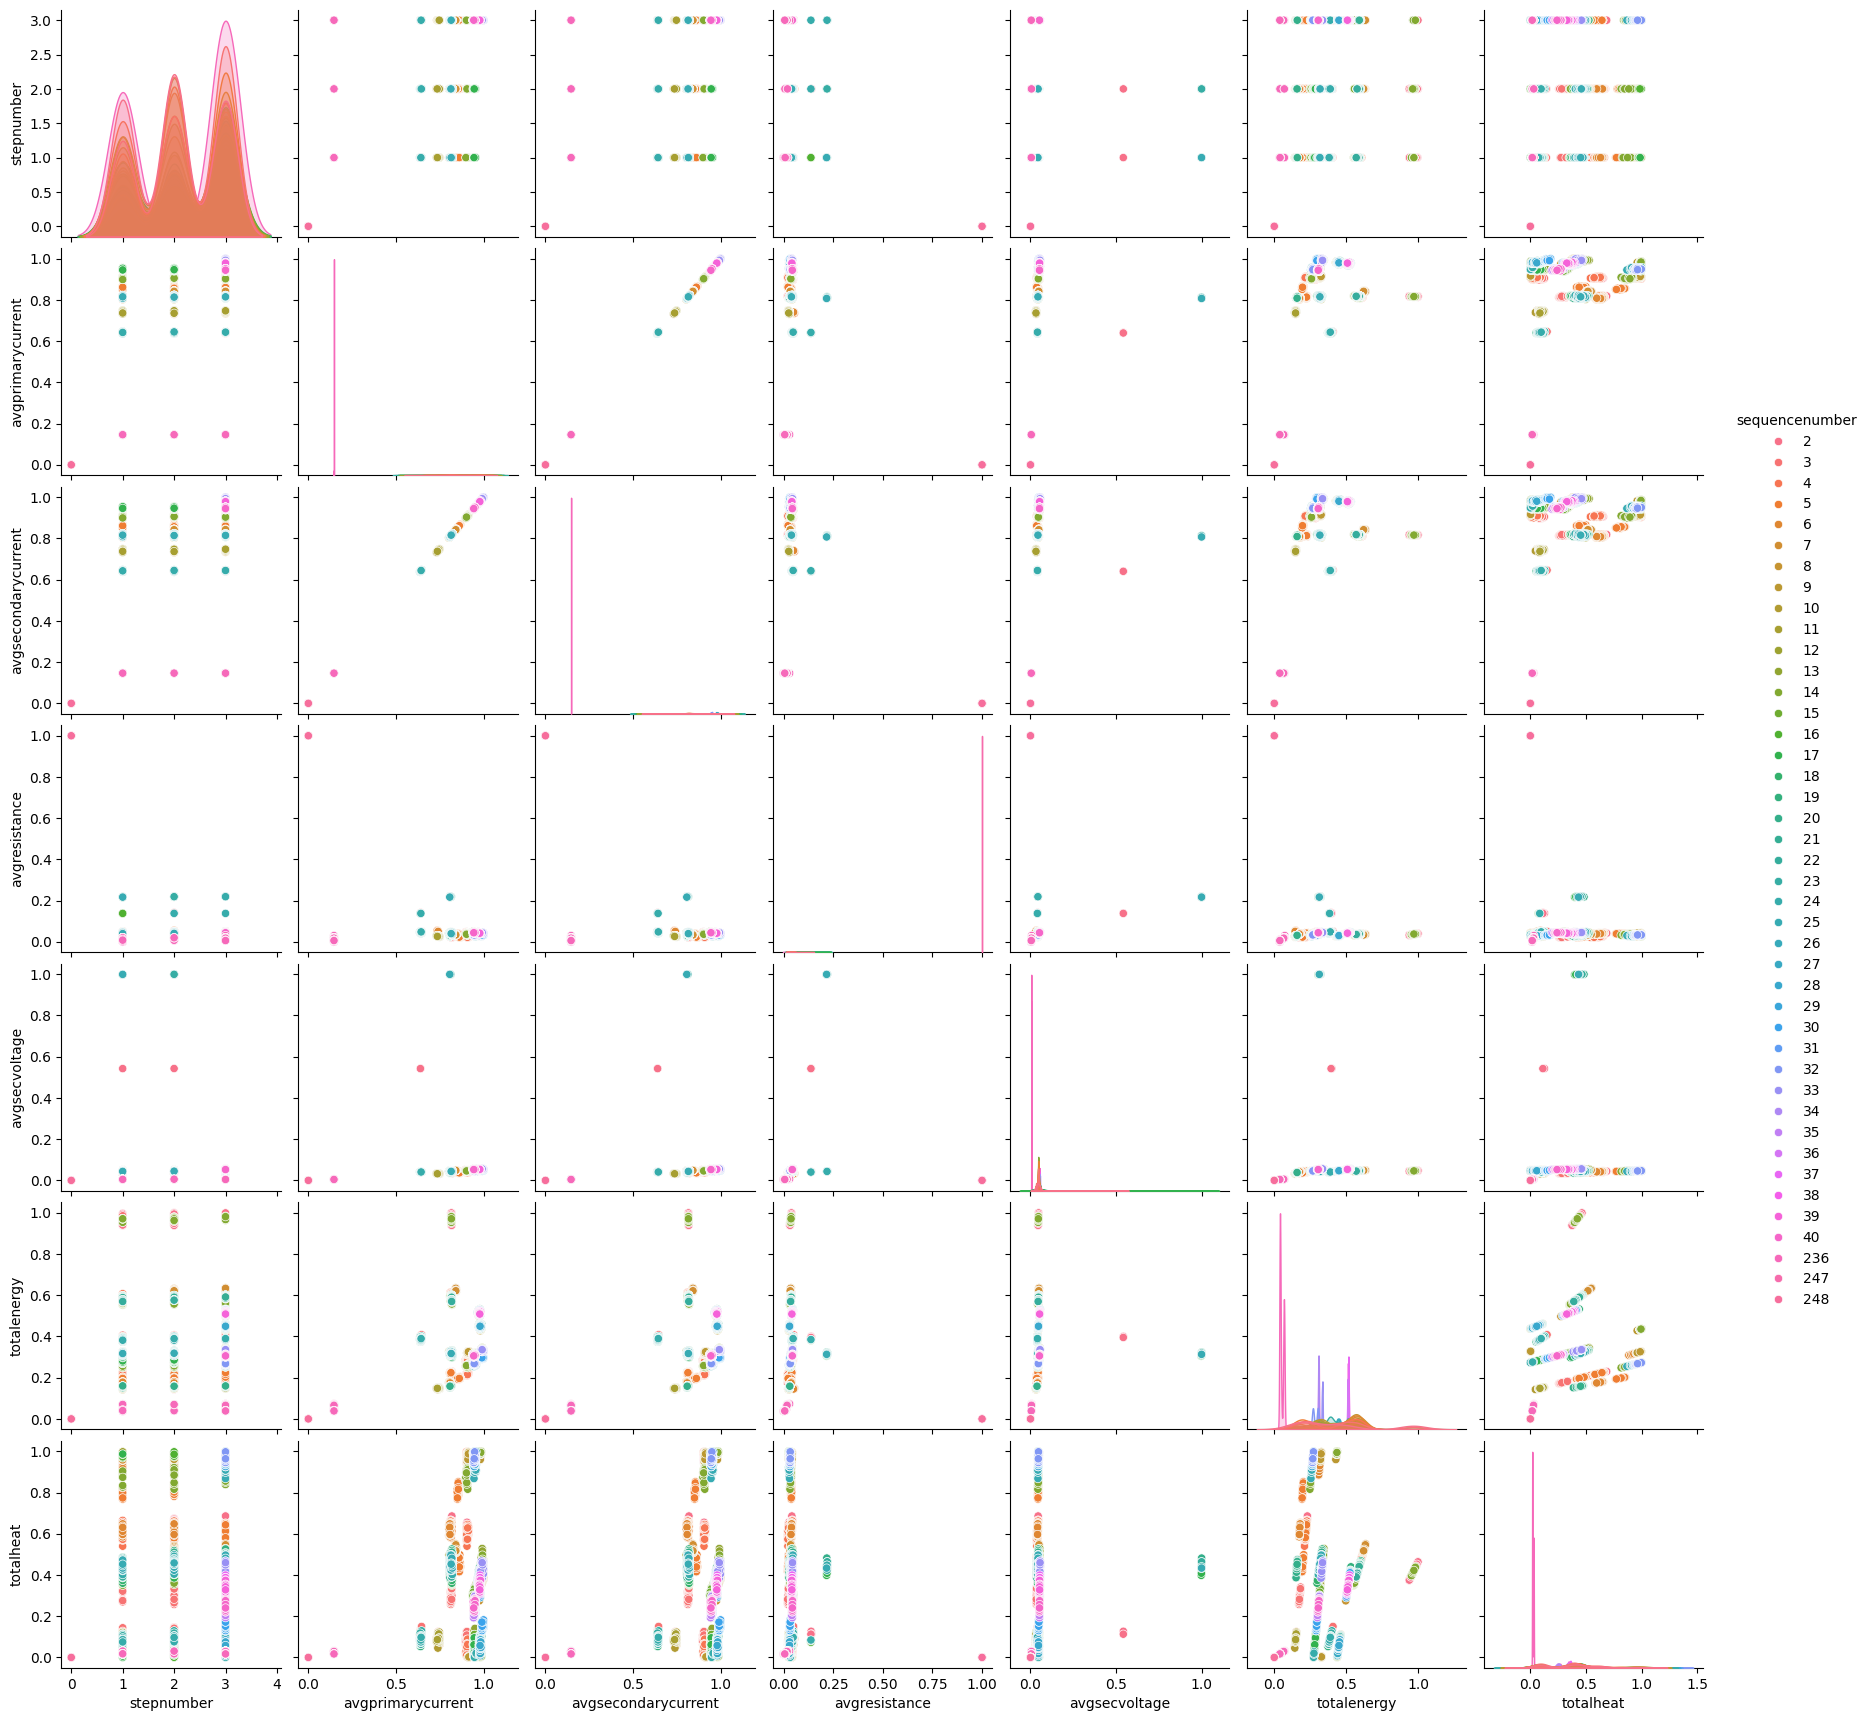

In [727]:
# Plotar os dados ordenados
sns.pairplot(sample_data, hue="sequencenumber", palette="husl")

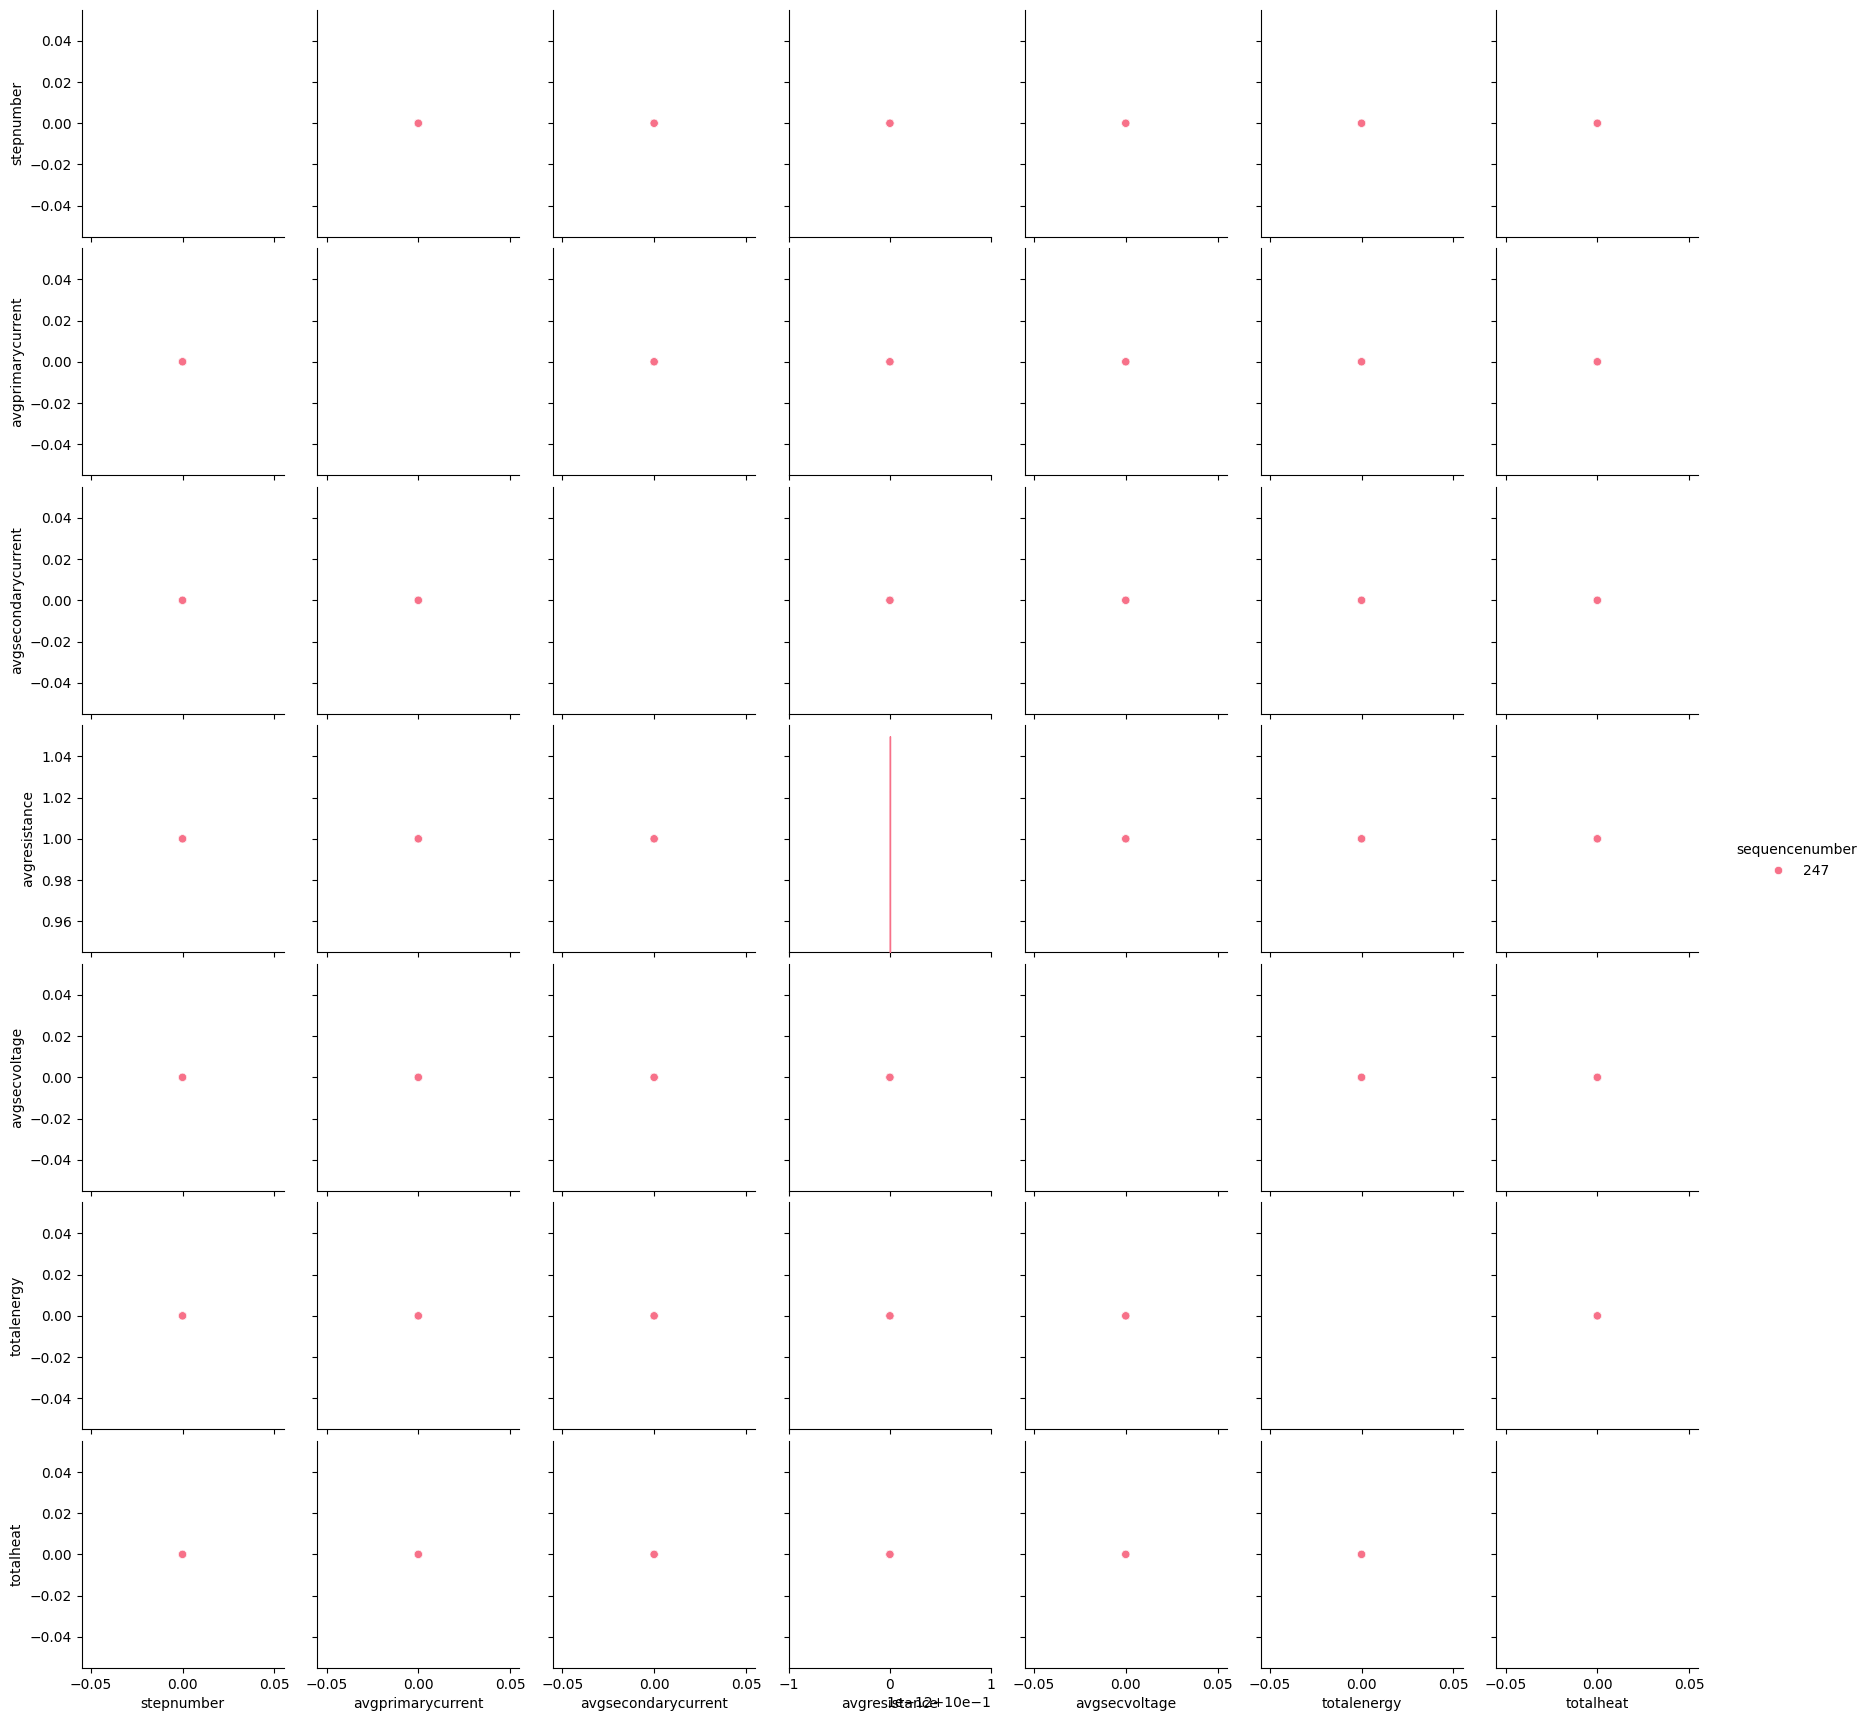

In [728]:
# Filtrar o DataFrame para incluir apenas os valores em que 'sequencenumber' é igual a 247
sample_data_filtered_247 = sample_data[sample_data['sequencenumber'] == '247']

# Plotar o pair plot para os valores filtrados
sns.pairplot(sample_data_filtered_247, hue="sequencenumber", palette="husl")

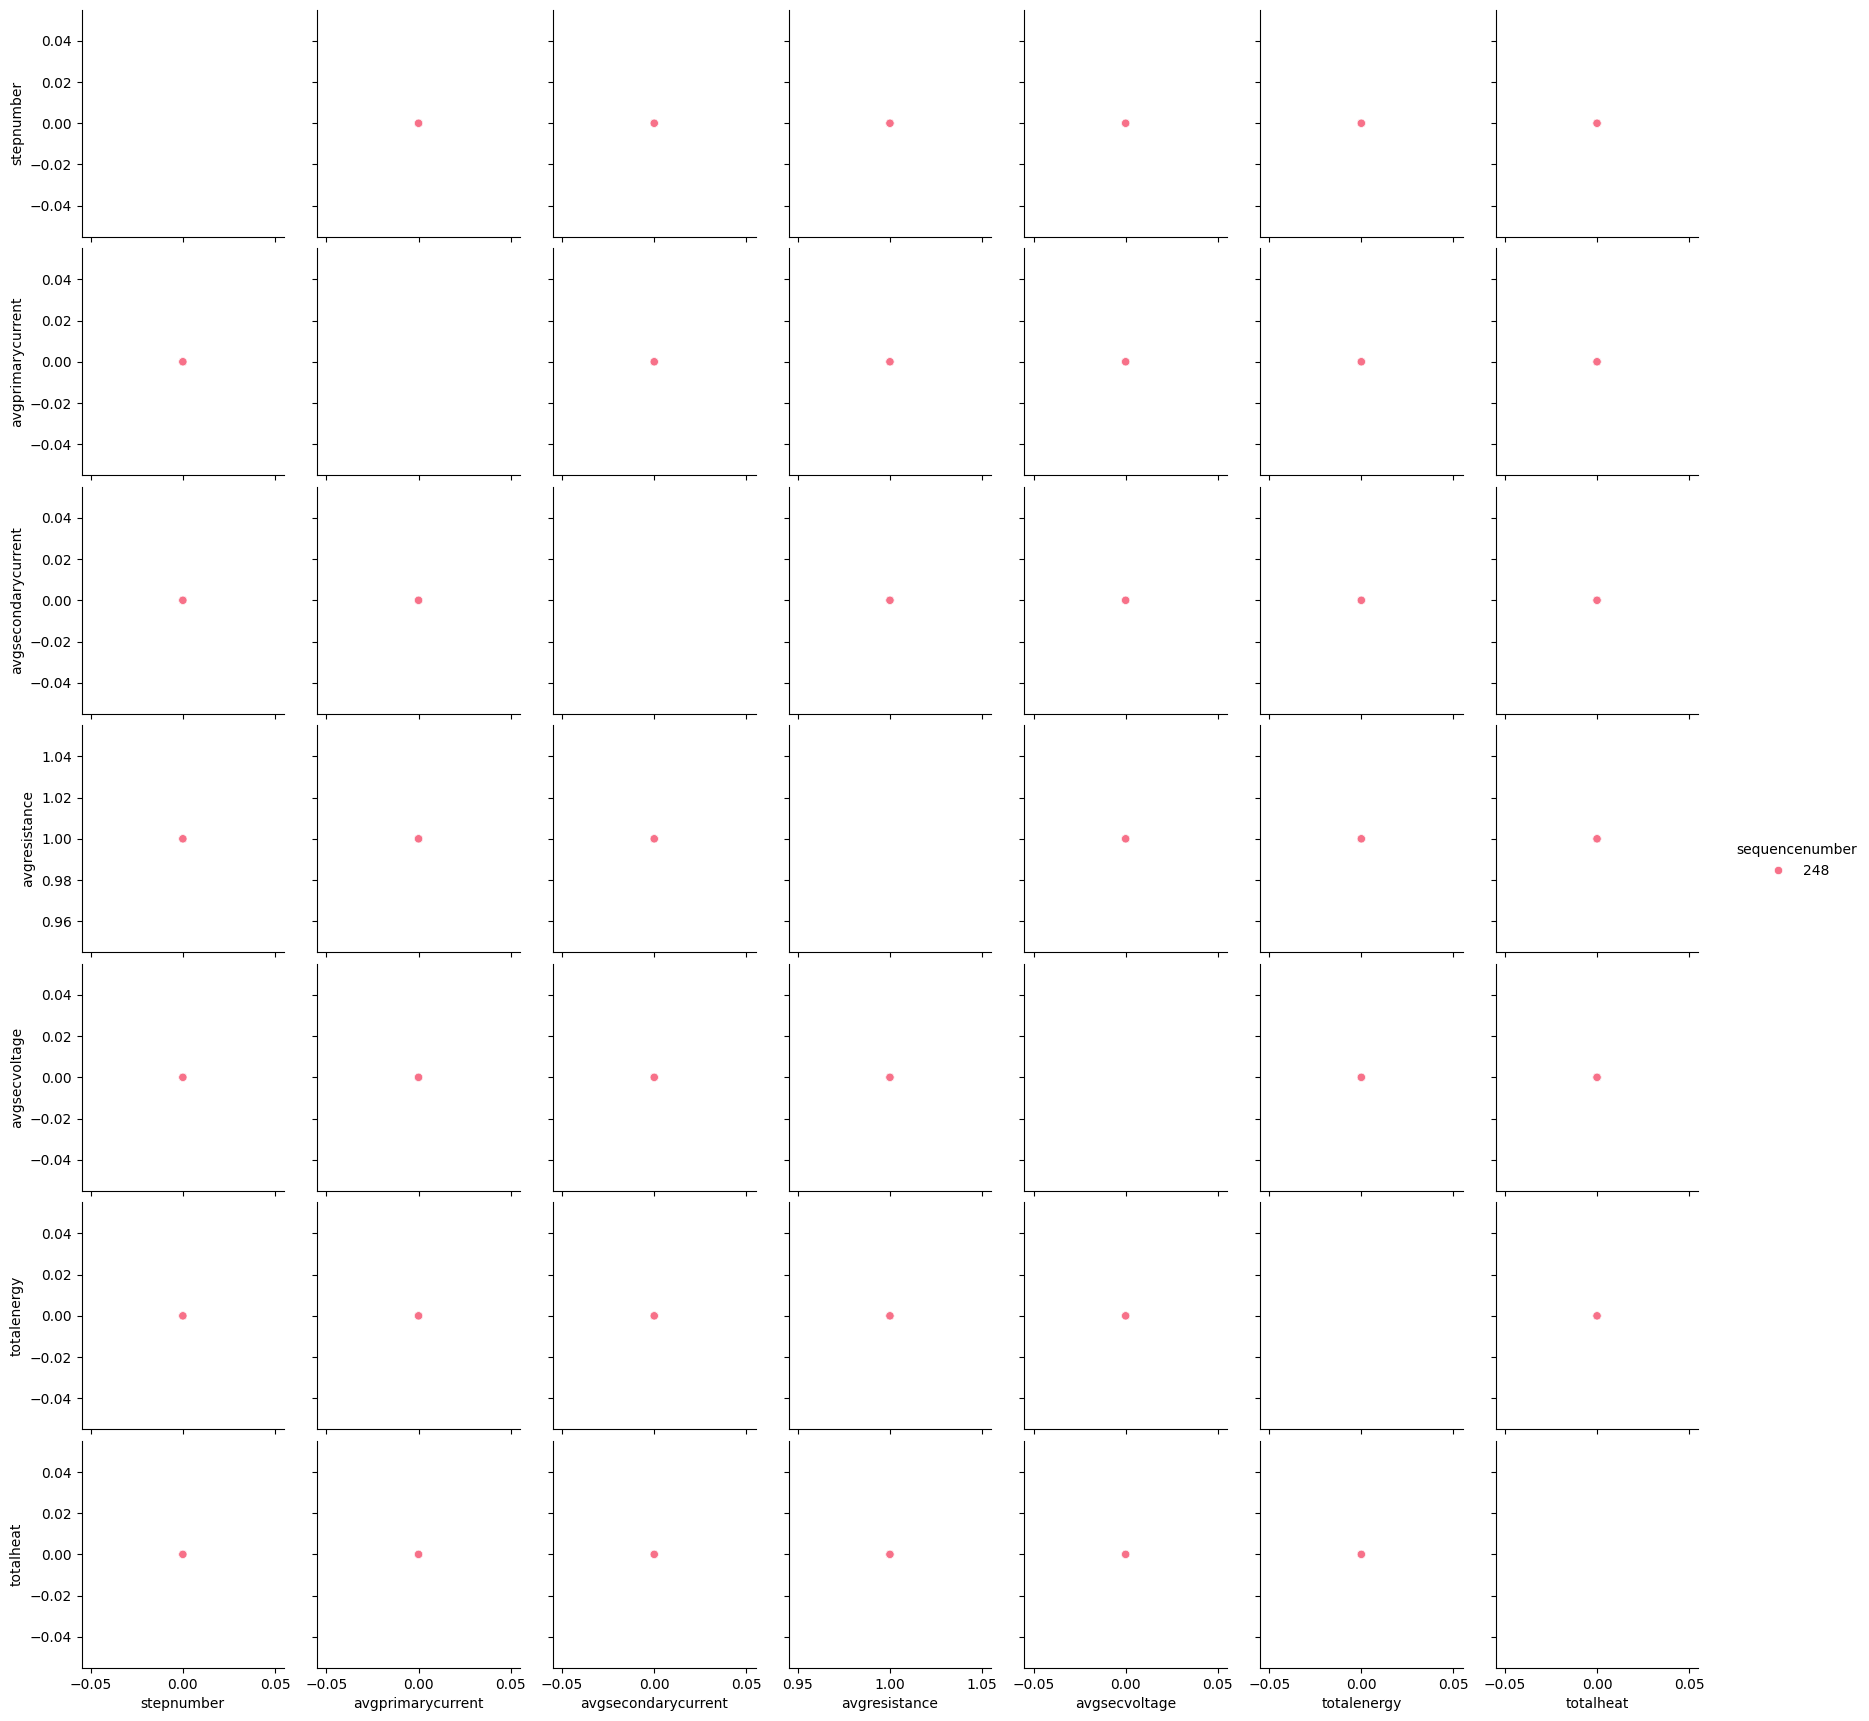

In [729]:
# Filtrar o DataFrame para incluir apenas os valores em que 'sequencenumber' é igual a 248
sample_data_filtered_248 = sample_data[sample_data['sequencenumber'] == '248']

# Plotar o pair plot para os valores filtrados
sns.pairplot(sample_data_filtered_248, hue="sequencenumber", palette="husl")

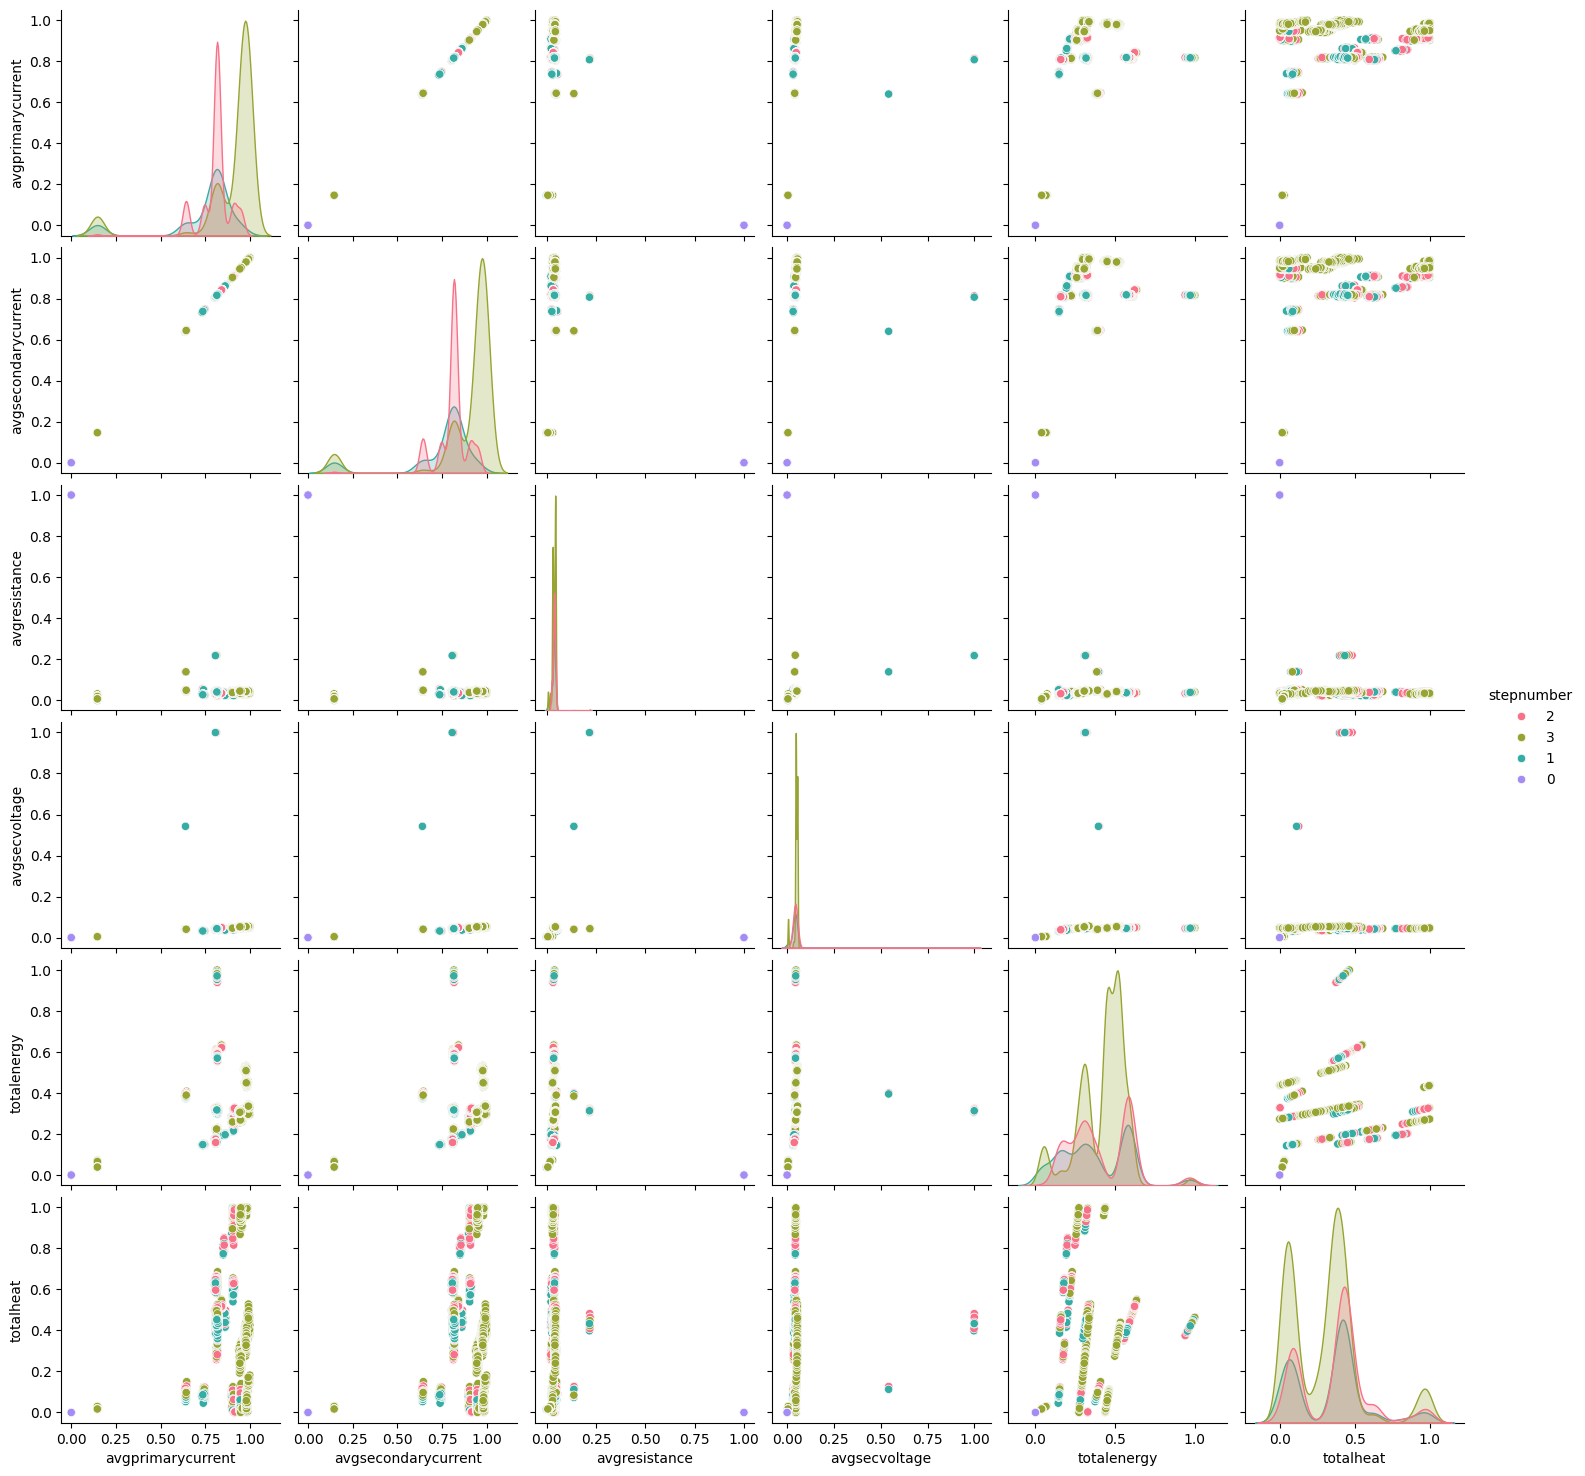

In [730]:
# Converter a coluna "sequencenumber" para tipo string
sample_data['stepnumber'] = sample_data['stepnumber'].astype(str)

# Plotar os dados ordenados
sns.pairplot(sample_data, hue="stepnumber", palette="husl")

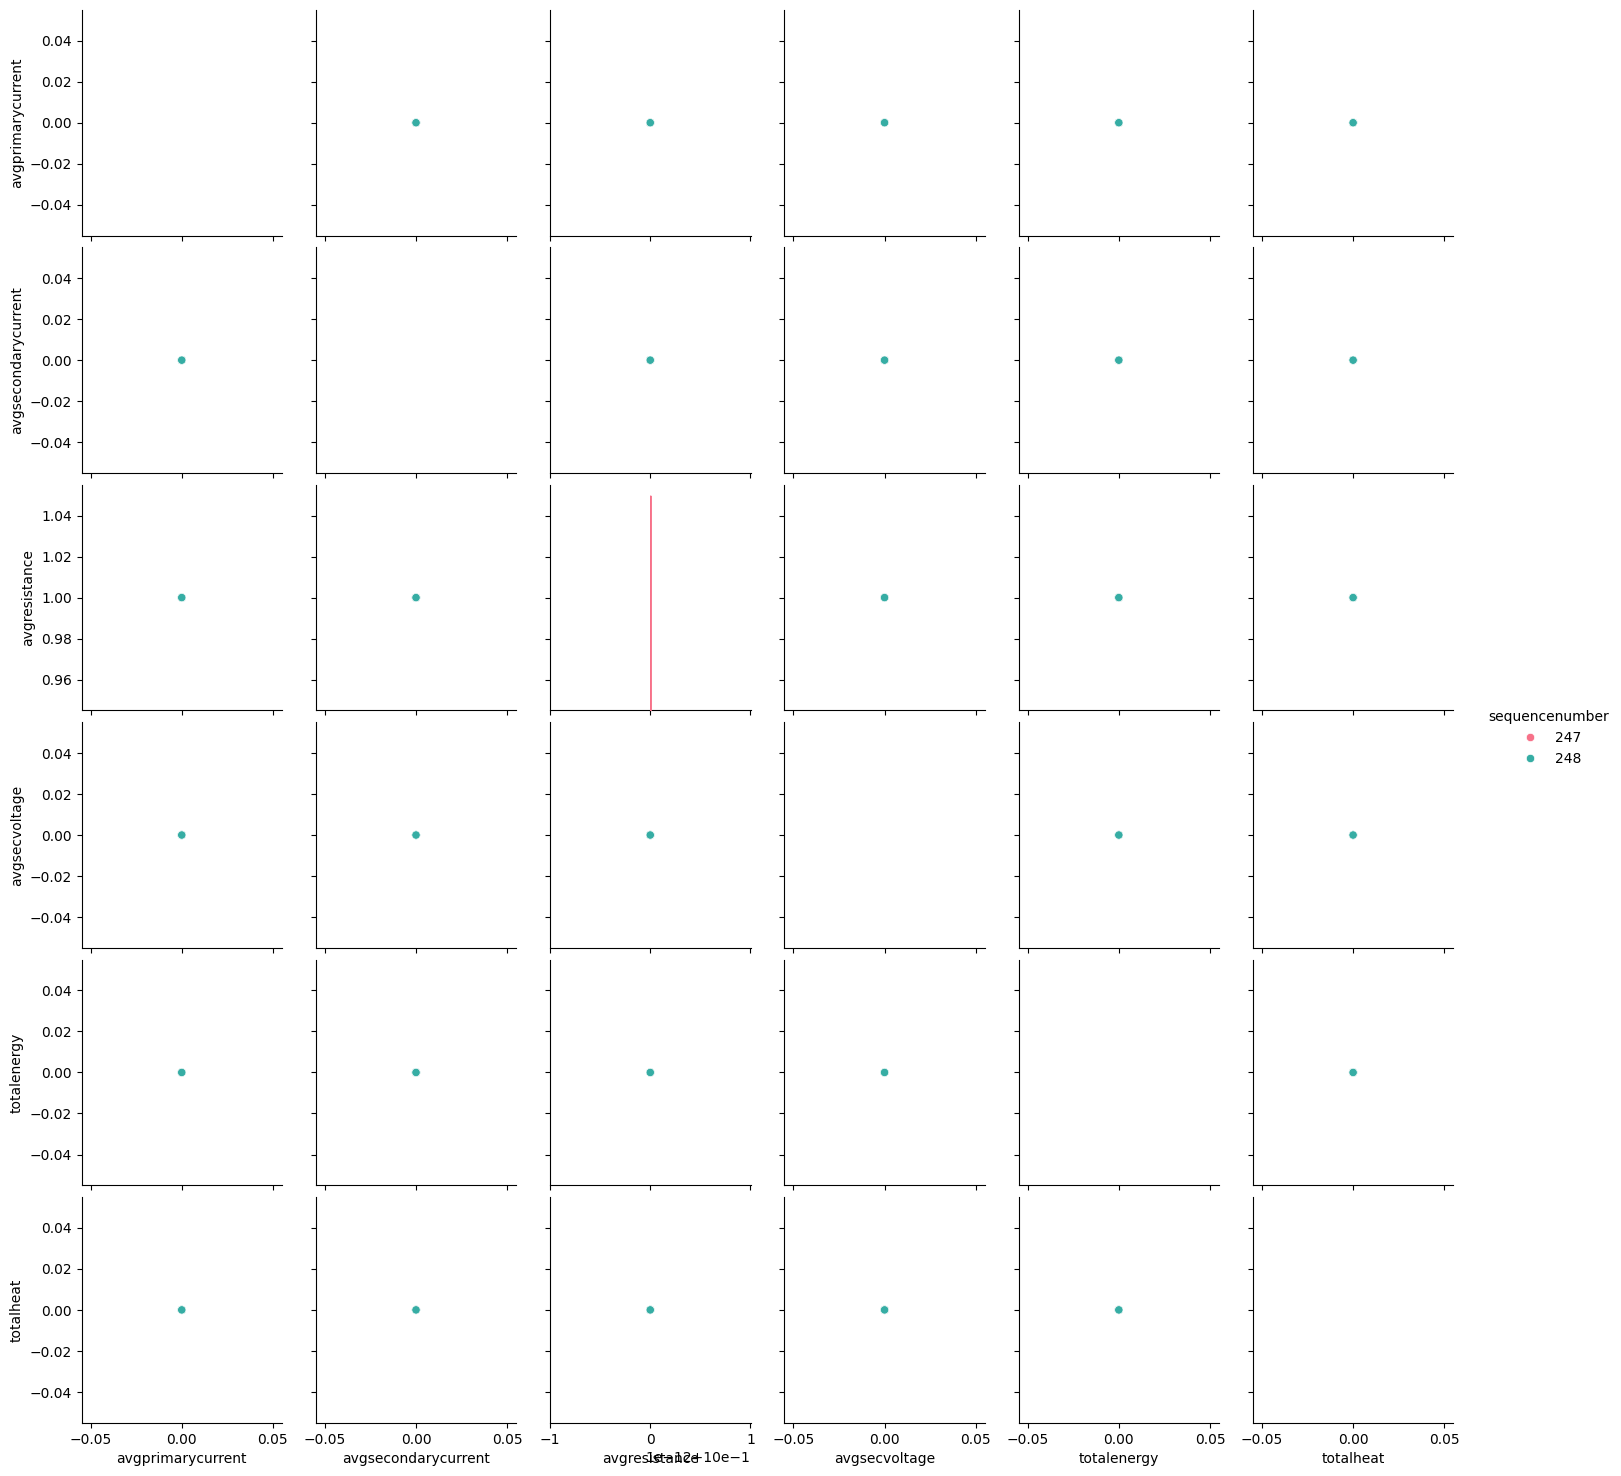

In [731]:
# Filtrar o DataFrame para incluir apenas os valores em que 'stepnumber' é igual a 0
sample_data_filtered_0 = sample_data[sample_data['stepnumber'] == '0']

# Plotar o pair plot para os valores filtrados
sns.pairplot(sample_data_filtered_0, hue="sequencenumber", palette="husl")


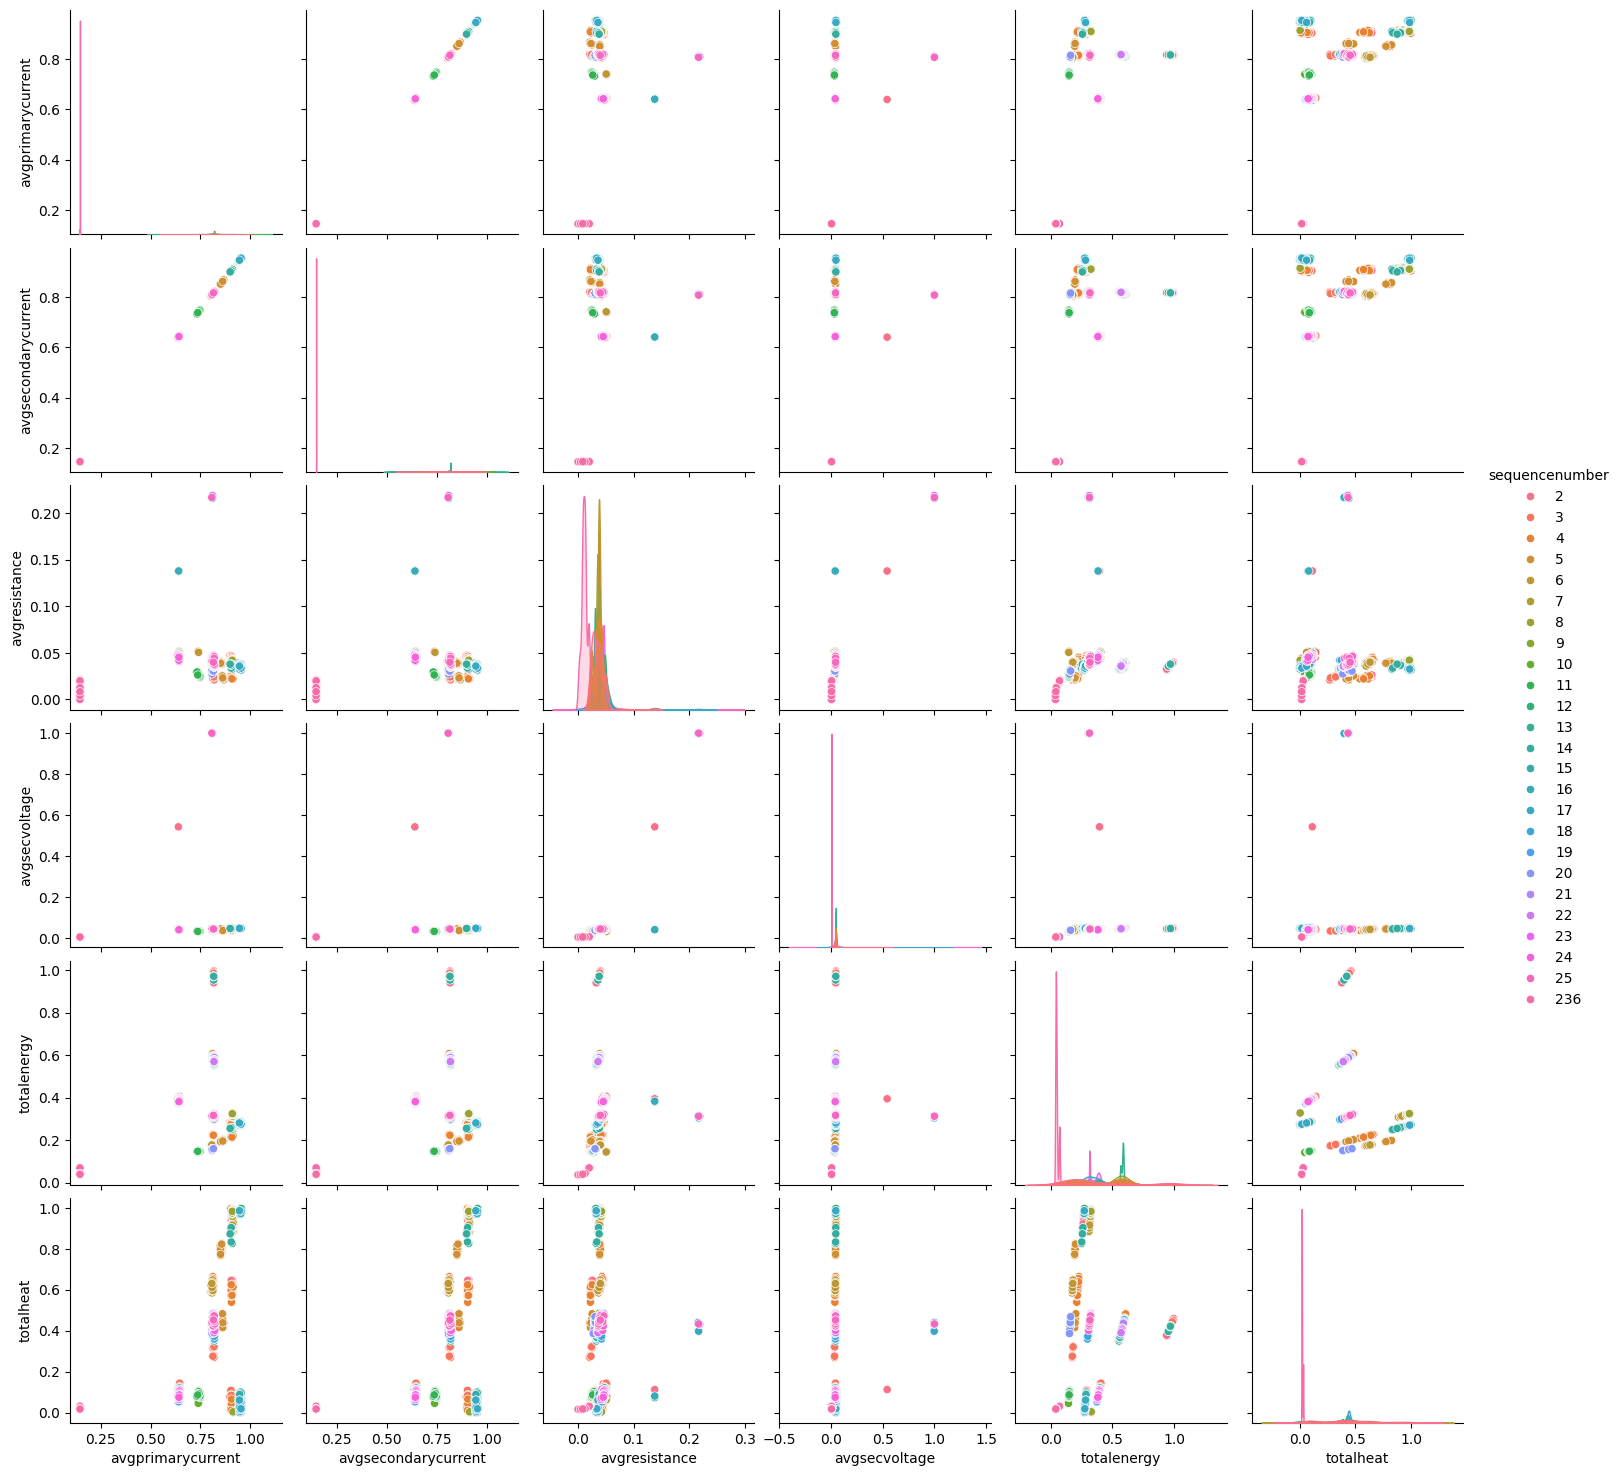

In [732]:
# Filtrar o DataFrame para incluir apenas os valores em que 'stepnumber' é igual a 1
sample_data_filtered_1 = sample_data[sample_data['stepnumber'] == '1']

# Plotar o pair plot para os valores filtrados
sns.pairplot(sample_data_filtered_1, hue="sequencenumber", palette="husl")

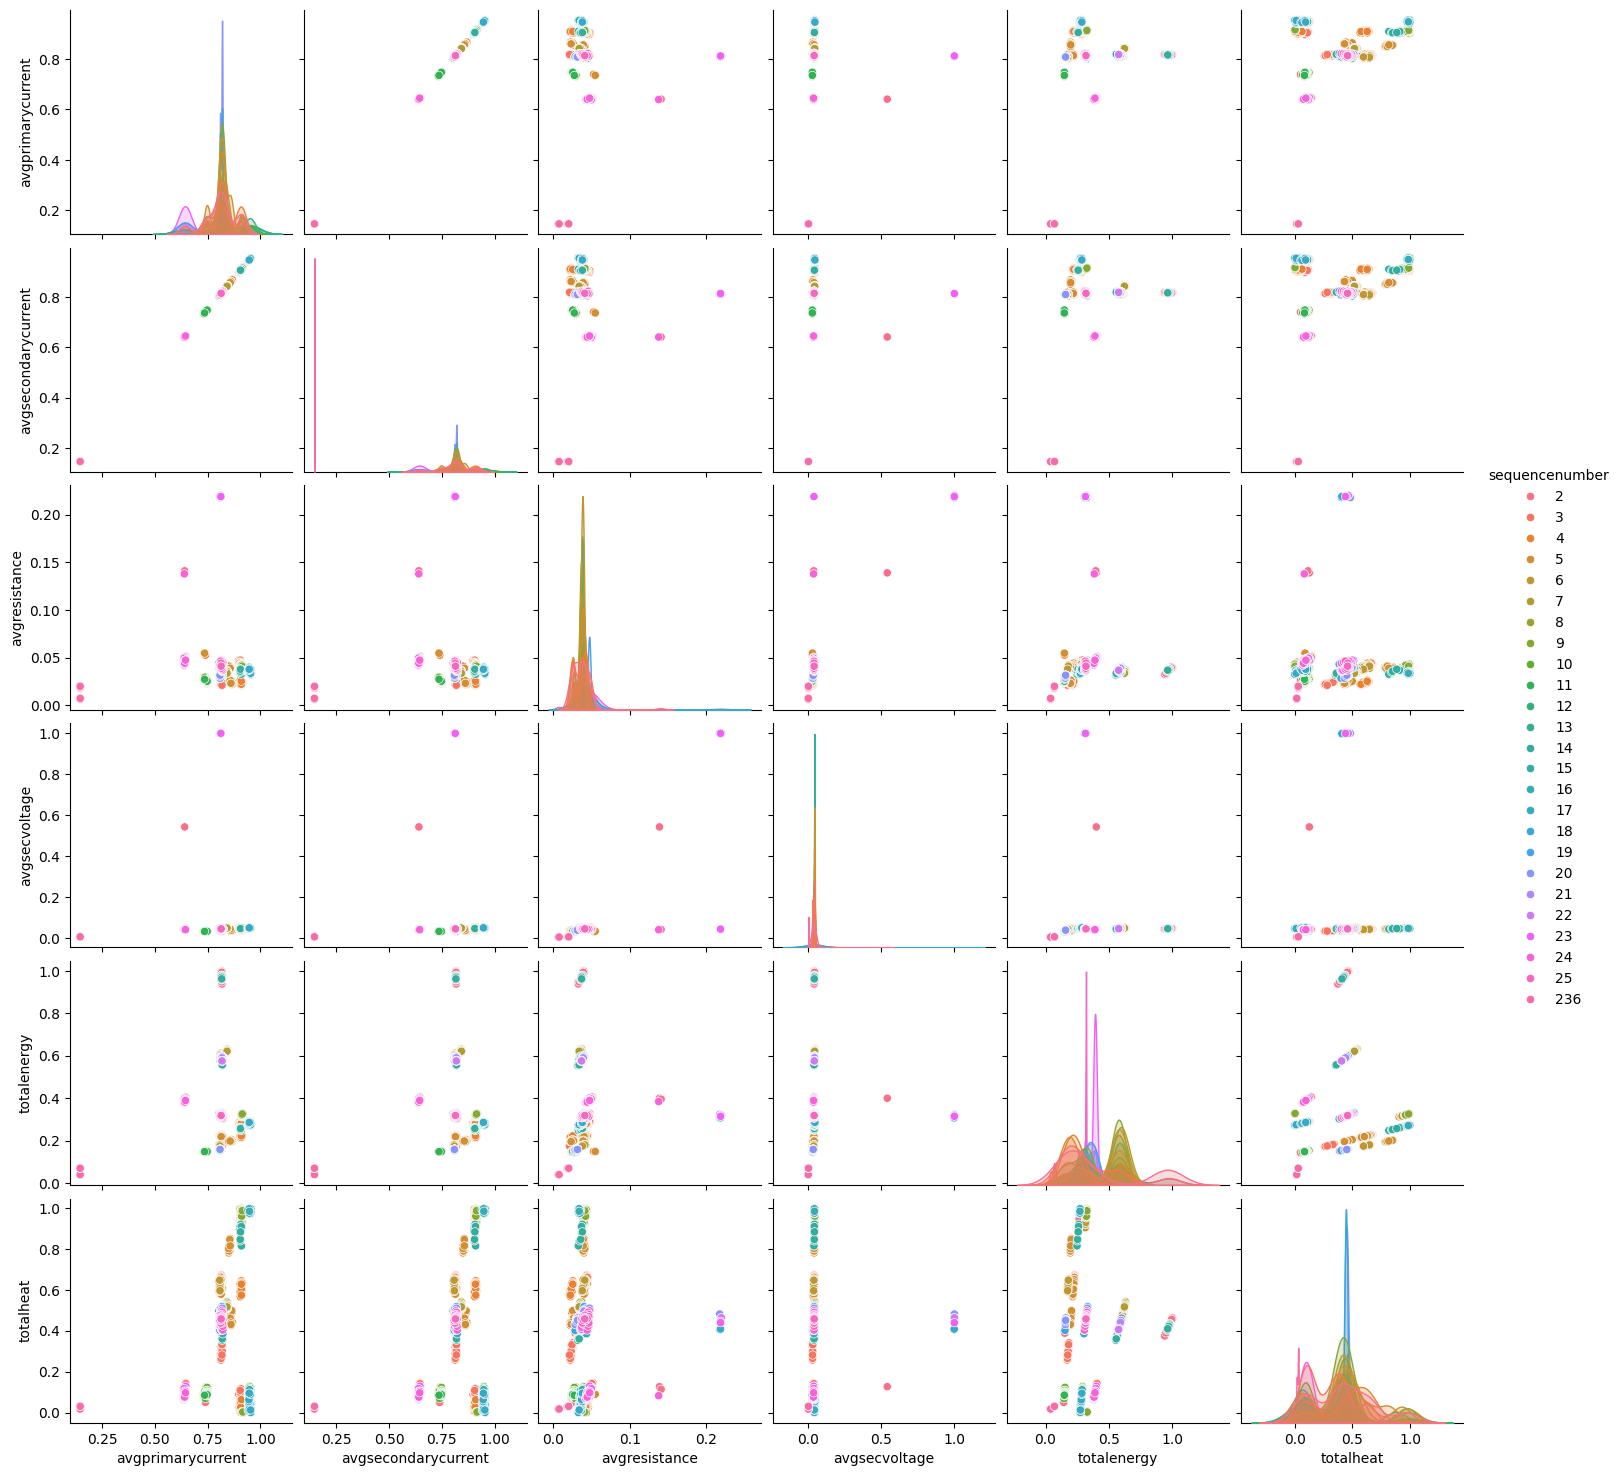

In [733]:
# Filtrar o DataFrame para incluir apenas os valores em que 'stepnumber' é igual a 2
sample_data_filtered_2 = sample_data[sample_data['stepnumber'] == '2']

# Plotar o pair plot para os valores filtrados
sns.pairplot(sample_data_filtered_2, hue="sequencenumber", palette="husl")

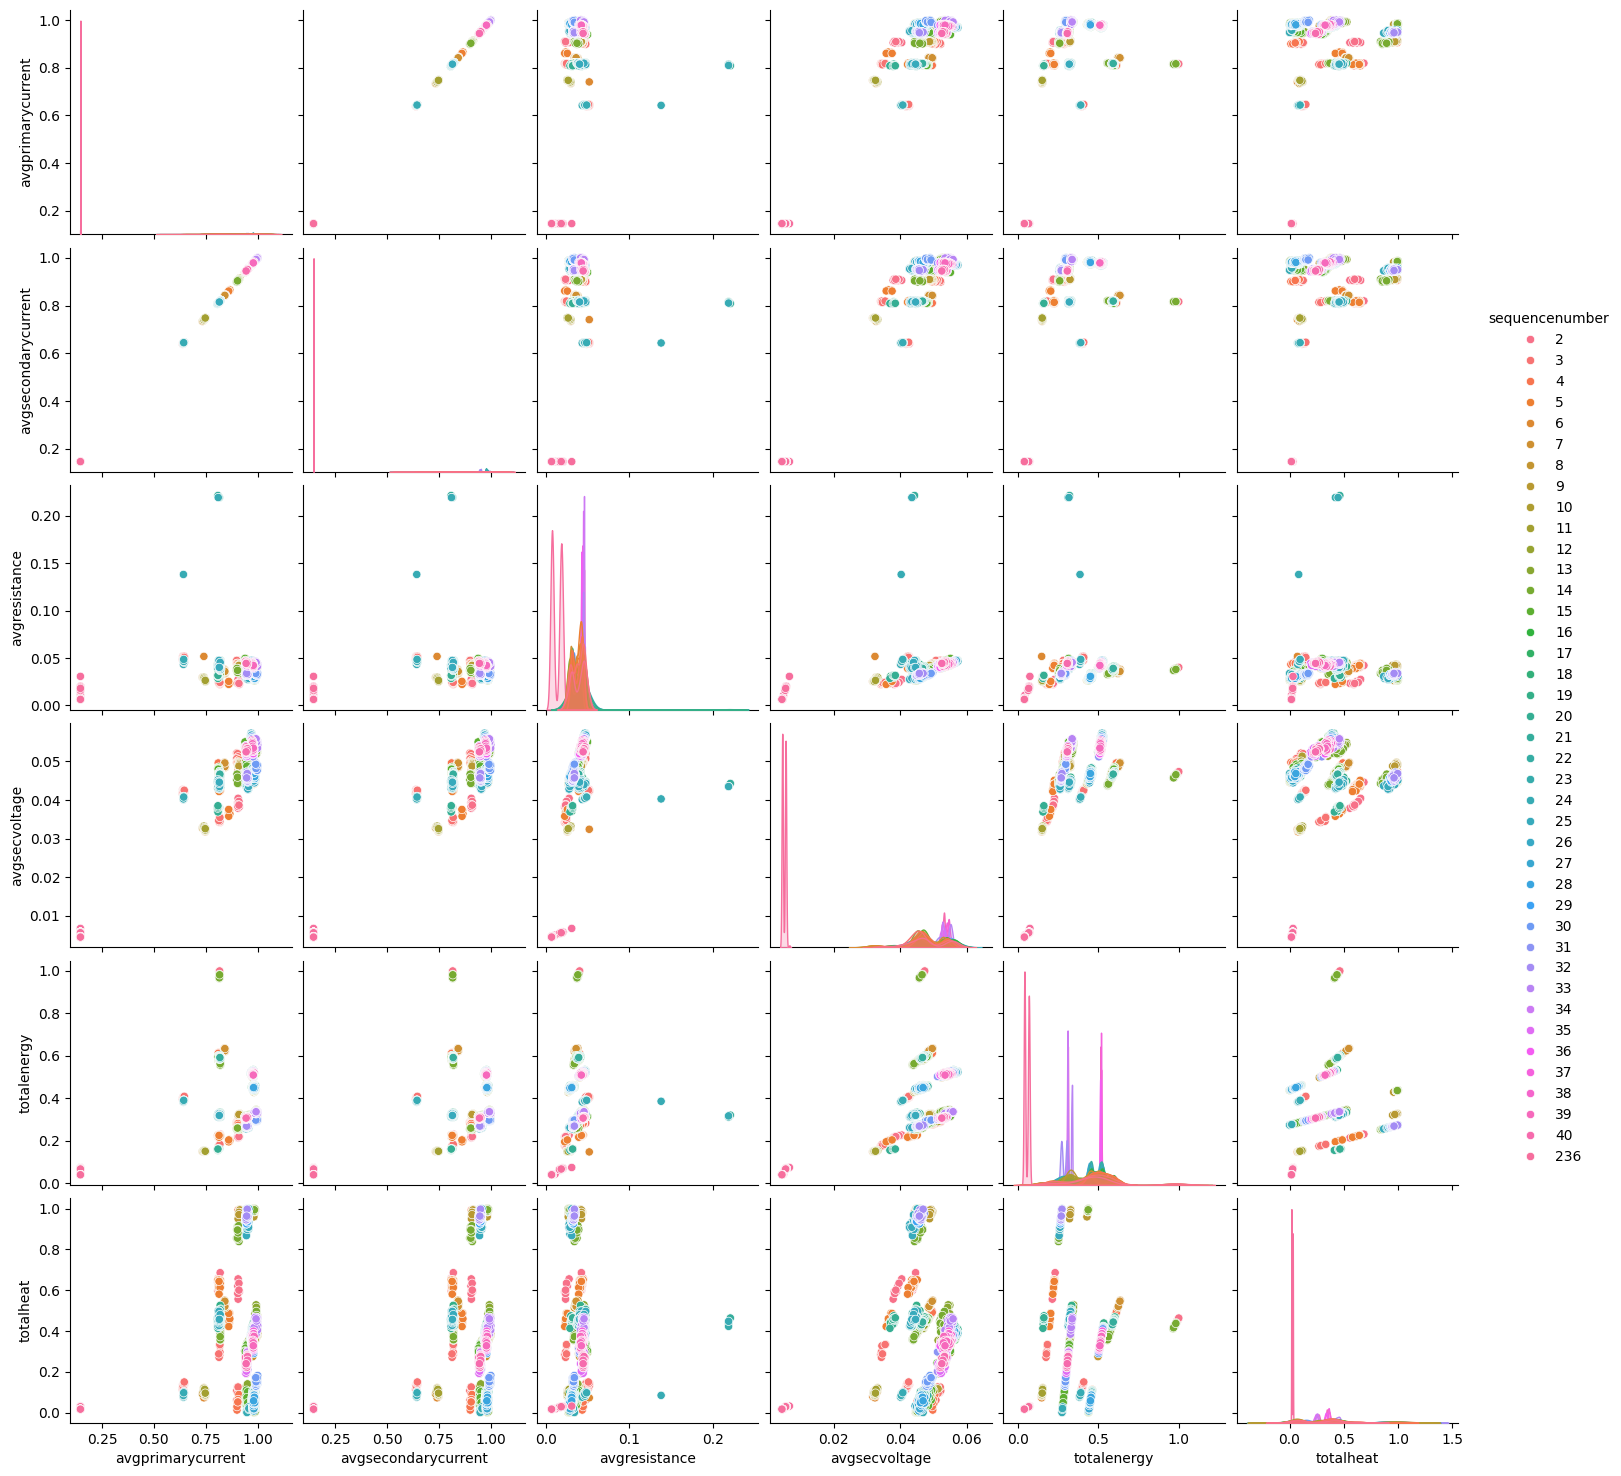

In [734]:
# Filtrar o DataFrame para incluir apenas os valores em que 'stepnumber' é igual a 3
sample_data_filtered_3 = sample_data[sample_data['stepnumber'] == '3']

# Plotar o pair plot para os valores filtrados
sns.pairplot(sample_data_filtered_3, hue="sequencenumber", palette="husl")

In [735]:
sample_data.head()

,timestamp_sm,sequencenumber,stepnumber,spot_id,stackup,avgprimarycurrent,avgsecondarycurrent,avgresistance,avgsecvoltage,totalenergy,totalheat
514,2024-03-28 03:18:31.208054,2,2,20YD168,2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW1...,0.905585,0.906477,0.043203,0.048941,0.274849,0.012636
3961,2024-03-28 10:32:31.402089,2,2,20YD2,2 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW1...,0.809840,0.809729,0.028451,0.036746,0.154199,0.411501
7705,2024-03-28 03:24:59.713518,2,3,20YD90,2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW1...,0.974734,0.975111,0.045311,0.055520,0.522192,0.389967
2416,2024-03-28 01:37:15.135433,2,2,20YD43,3 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW1...,0.816489,0.816277,0.038988,0.046534,0.984997,0.442633
8399,2024-03-28 11:58:29.226958,2,1,20YD185,1.2 - GMW15192M-AL-S-6000-IH-90-E - 1.5 - GMW1...,0.747340,0.748086,0.024236,0.031772,0.147947,0.083387


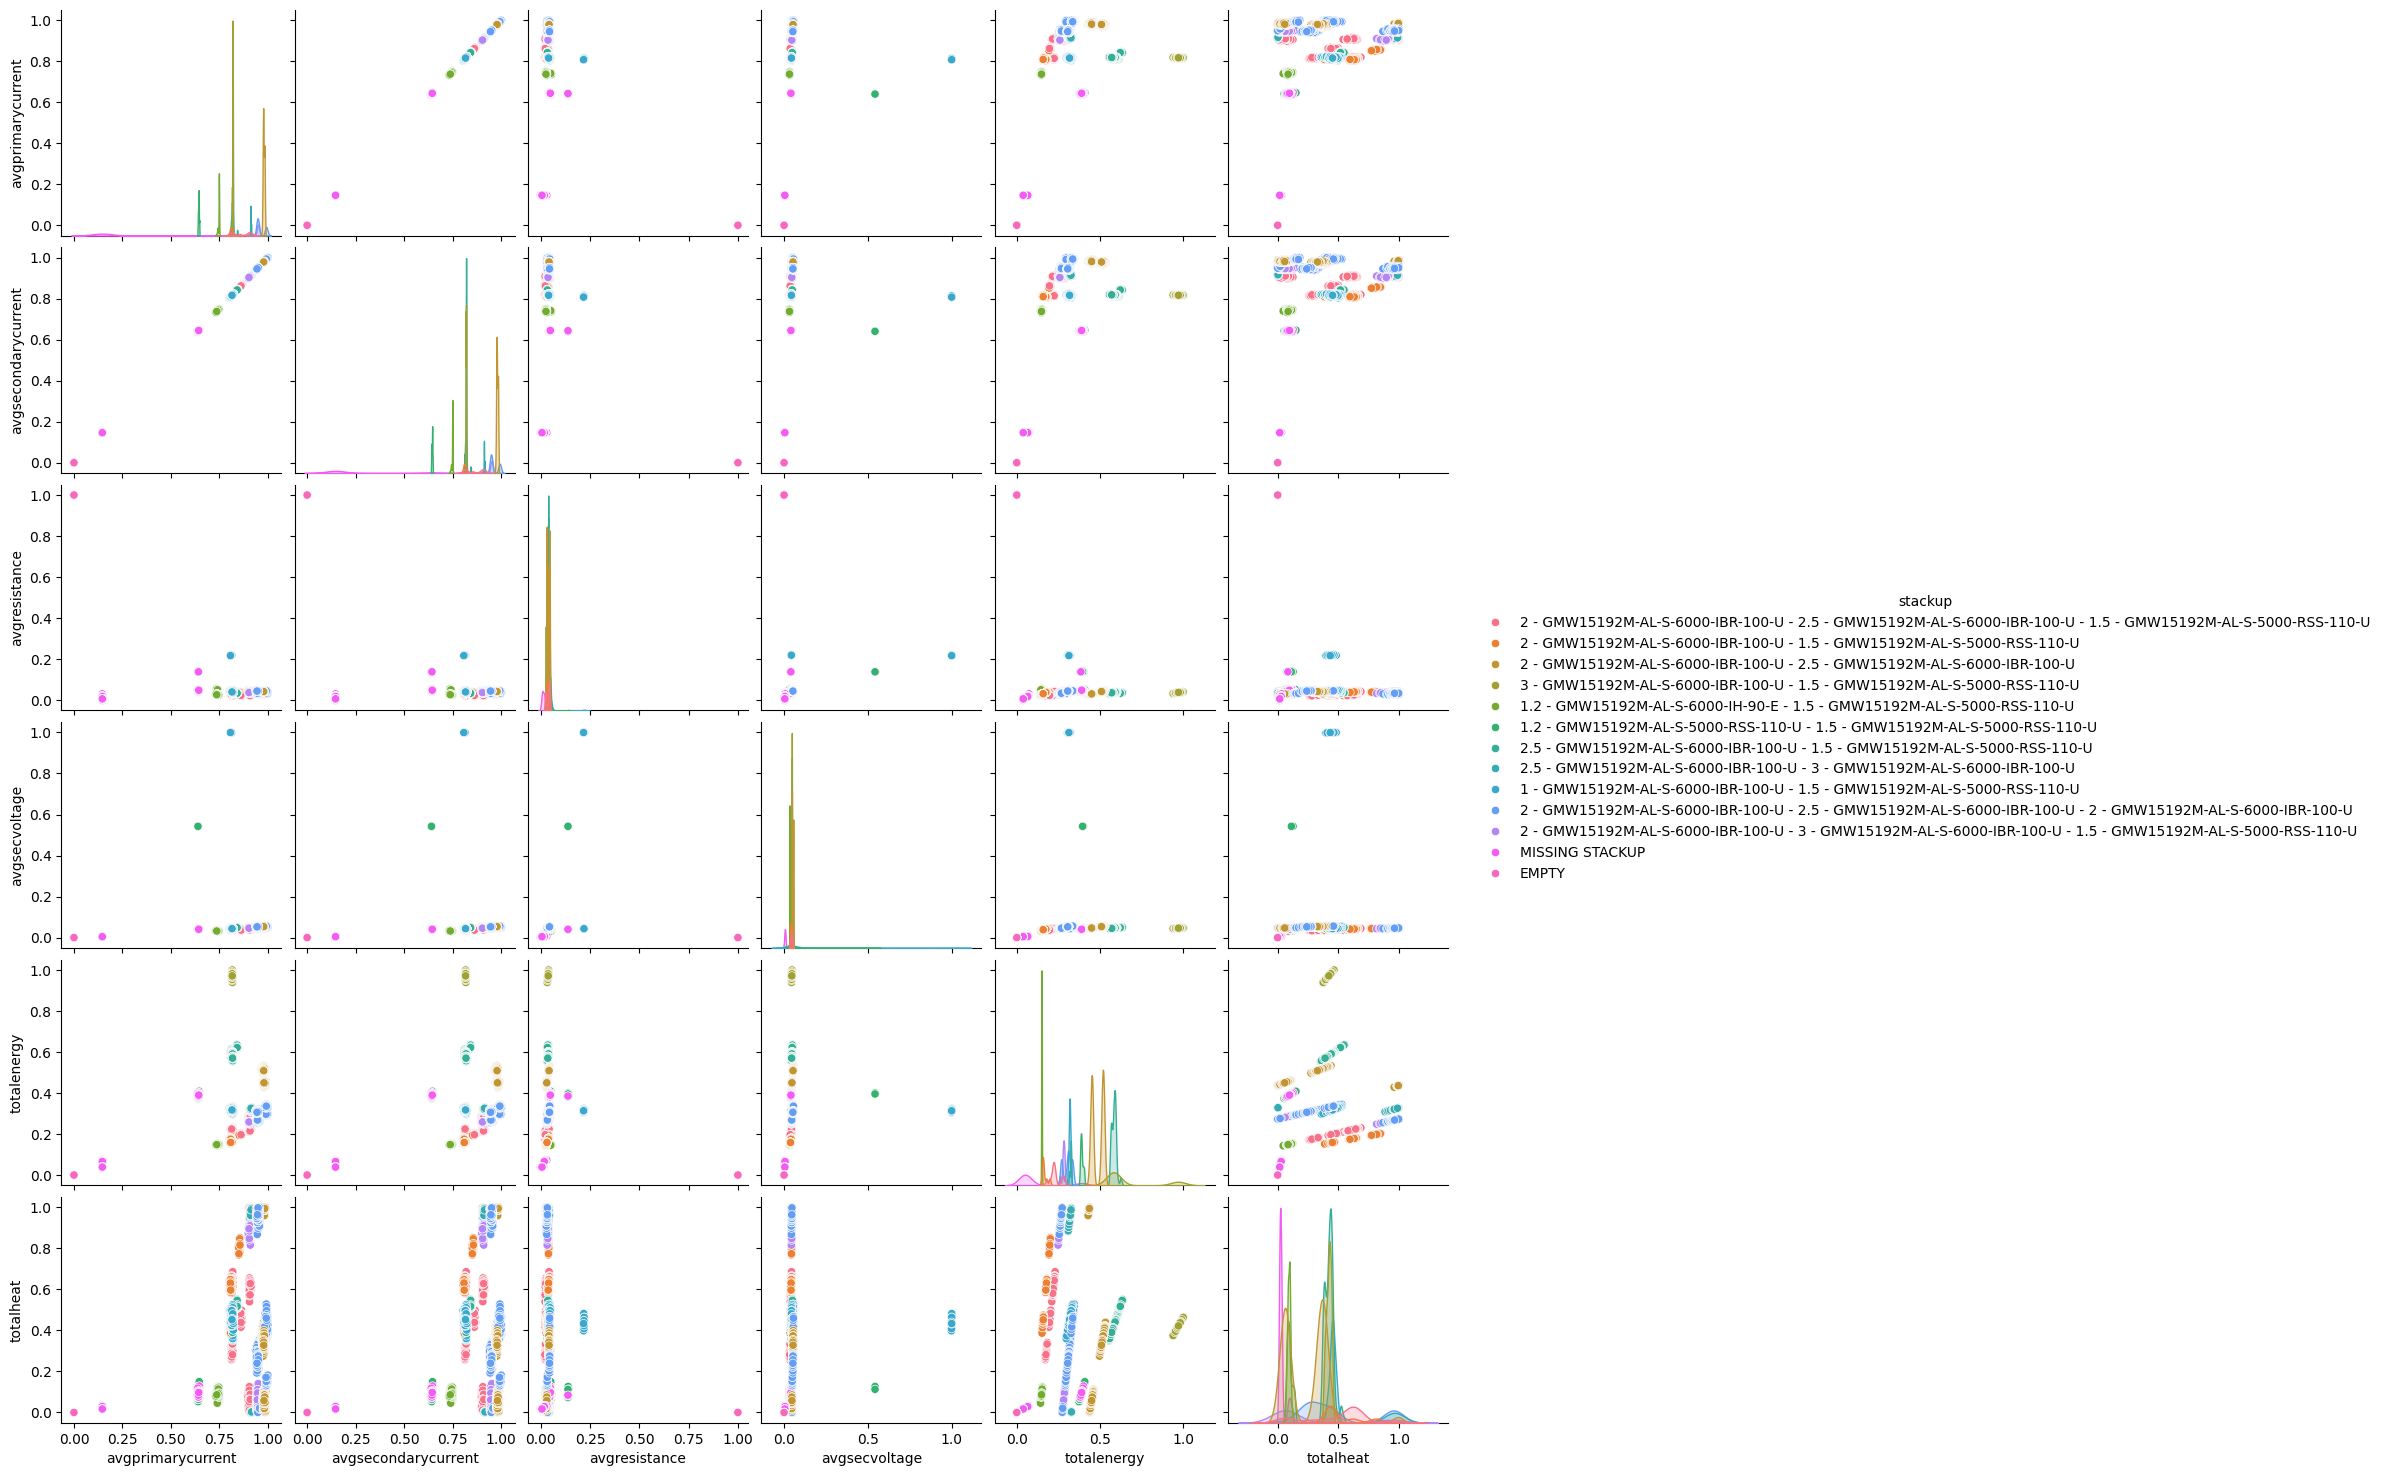

In [736]:
# Plotar os dados ordenados
sns.pairplot(sample_data, hue="stackup", palette="husl")

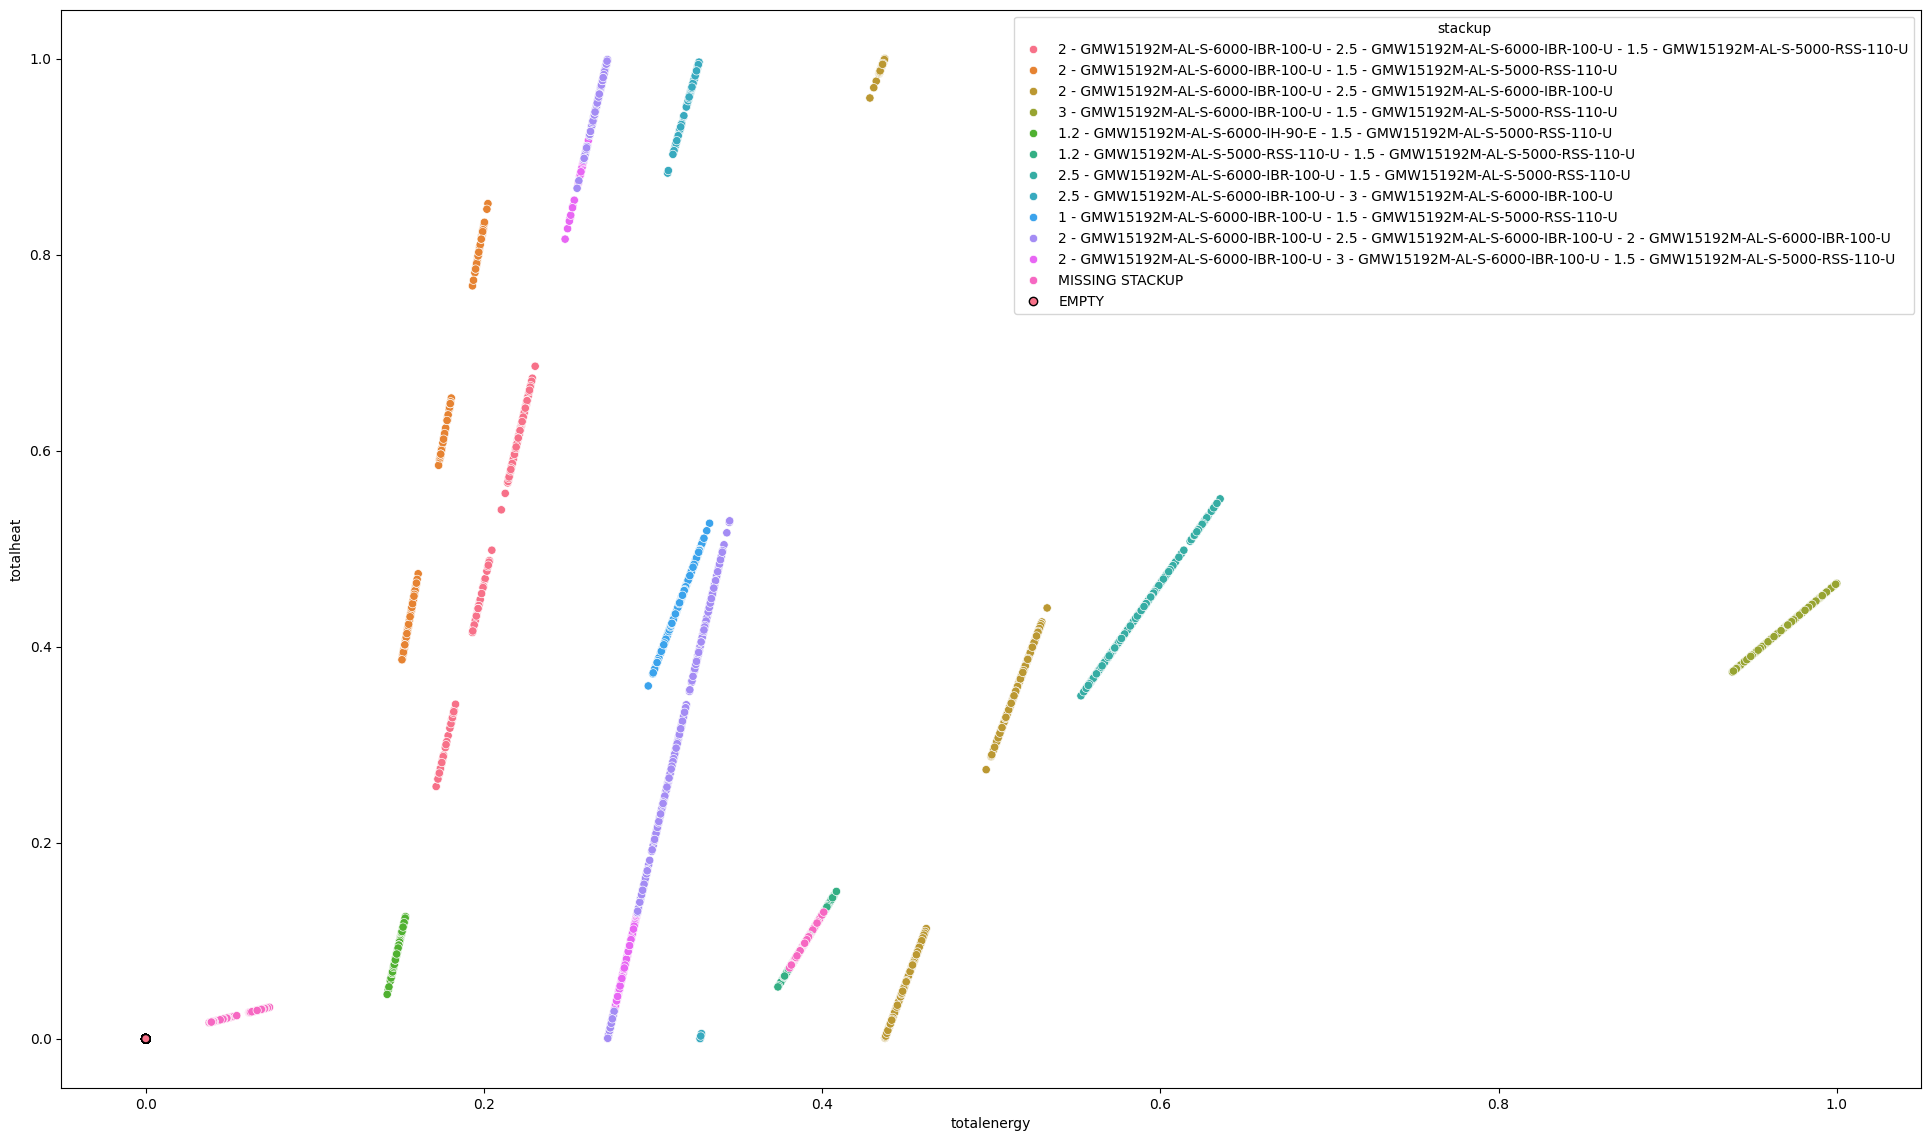

In [741]:
# Define isolation variable
variable = "stackup"

# Define o tamanho da figura e cria os eixos
fig, ax = plt.subplots(figsize=(24, 14))

# Filtra os dados onde o stackup não é 'EMPTY'
sample_data_filtered = sample_data[sample_data['stackup'] != 'EMPTY']

# Plota o gráfico de dispersão
sns.scatterplot(data=sample_data_filtered, x='totalenergy', y='totalheat', hue=variable, palette="husl", ax=ax)

# Filtra o DataFrame para incluir apenas os dados das operações de fresagem
sample_data_highlighted = sample_data[(sample_data[variable].isin(['EMPTY'])) & (sample_data['stepnumber'] == '0')]

# Plota os pontos destacados
sns.scatterplot(data=sample_data_highlighted, x='totalenergy', y='totalheat', hue=variable, palette="husl", edgecolor='black', linewidth=1, ax=ax)

# Adiciona tooltips aos pontos da imagem
mplcursors.cursor(hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f"Valor do pixel: {sel.artist.get_array()[sel.target.index]}")
)

# Mostra o gráfico
plt.show()

In [748]:
# Supondo que 'df' seja o seu DataFrame contendo os dados

# Primeiro, converta a coluna timestamp_sm para o tipo datetime
sample_data['timestamp_sm'] = pd.to_datetime(sample_data['timestamp_sm'])

# Em seguida, ordene os dados pelo timestamp_sm
sample_data = sample_data.sort_values(by='timestamp_sm')

# Encontre os índices onde 'MISSING STACKUP' aparece na coluna 'stackup'
missing_stackup_indices = sample_data.index[sample_data['stackup'] == 'MISSING STACKUP']

# Inicialize variáveis para armazenar os intervalos de tempo
missing_stackup_intervals = []

# Itere sobre os índices encontrados e agrupe-os em intervalos consecutivos
start_index = None
end_index = None
for index in missing_stackup_indices:
    if start_index is None:
        start_index = index
        end_index = index
    elif index == end_index + 1:
        end_index = index
    else:
        missing_stackup_intervals.append((sample_data.loc[start_index, 'timestamp_sm'], sample_data.loc[end_index, 'timestamp_sm']))
        start_index = index
        end_index = index

# Adicione o último intervalo, se houver
if start_index is not None:
    missing_stackup_intervals.append((sample_data.loc[start_index, 'timestamp_sm'], sample_data.loc[end_index, 'timestamp_sm']))

# Print dos intervalos de tempo encontrados
for interval in missing_stackup_intervals:
    print("Intervalo de tempo com 'MISSING STACKUP':", interval)


Intervalo de tempo com 'MISSING STACKUP': (Timestamp('2024-03-28 00:21:27.870875'), Timestamp('2024-03-28 00:21:27.870875'))
Intervalo de tempo com 'MISSING STACKUP': (Timestamp('2024-03-28 00:21:45.734781'), Timestamp('2024-03-28 00:21:45.734781'))
Intervalo de tempo com 'MISSING STACKUP': (Timestamp('2024-03-28 00:22:10.524368'), Timestamp('2024-03-28 00:22:10.524368'))
Intervalo de tempo com 'MISSING STACKUP': (Timestamp('2024-03-28 00:22:27.300911'), Timestamp('2024-03-28 00:22:27.300911'))
Intervalo de tempo com 'MISSING STACKUP': (Timestamp('2024-03-28 00:23:10.010564'), Timestamp('2024-03-28 00:23:10.010564'))
Intervalo de tempo com 'MISSING STACKUP': (Timestamp('2024-03-28 00:23:12.834901'), Timestamp('2024-03-28 00:23:12.834901'))
Intervalo de tempo com 'MISSING STACKUP': (Timestamp('2024-03-28 00:24:22.776727'), Timestamp('2024-03-28 00:24:22.776727'))
Intervalo de tempo com 'MISSING STACKUP': (Timestamp('2024-03-28 00:24:27.348416'), Timestamp('2024-03-28 00:24:27.348416'))


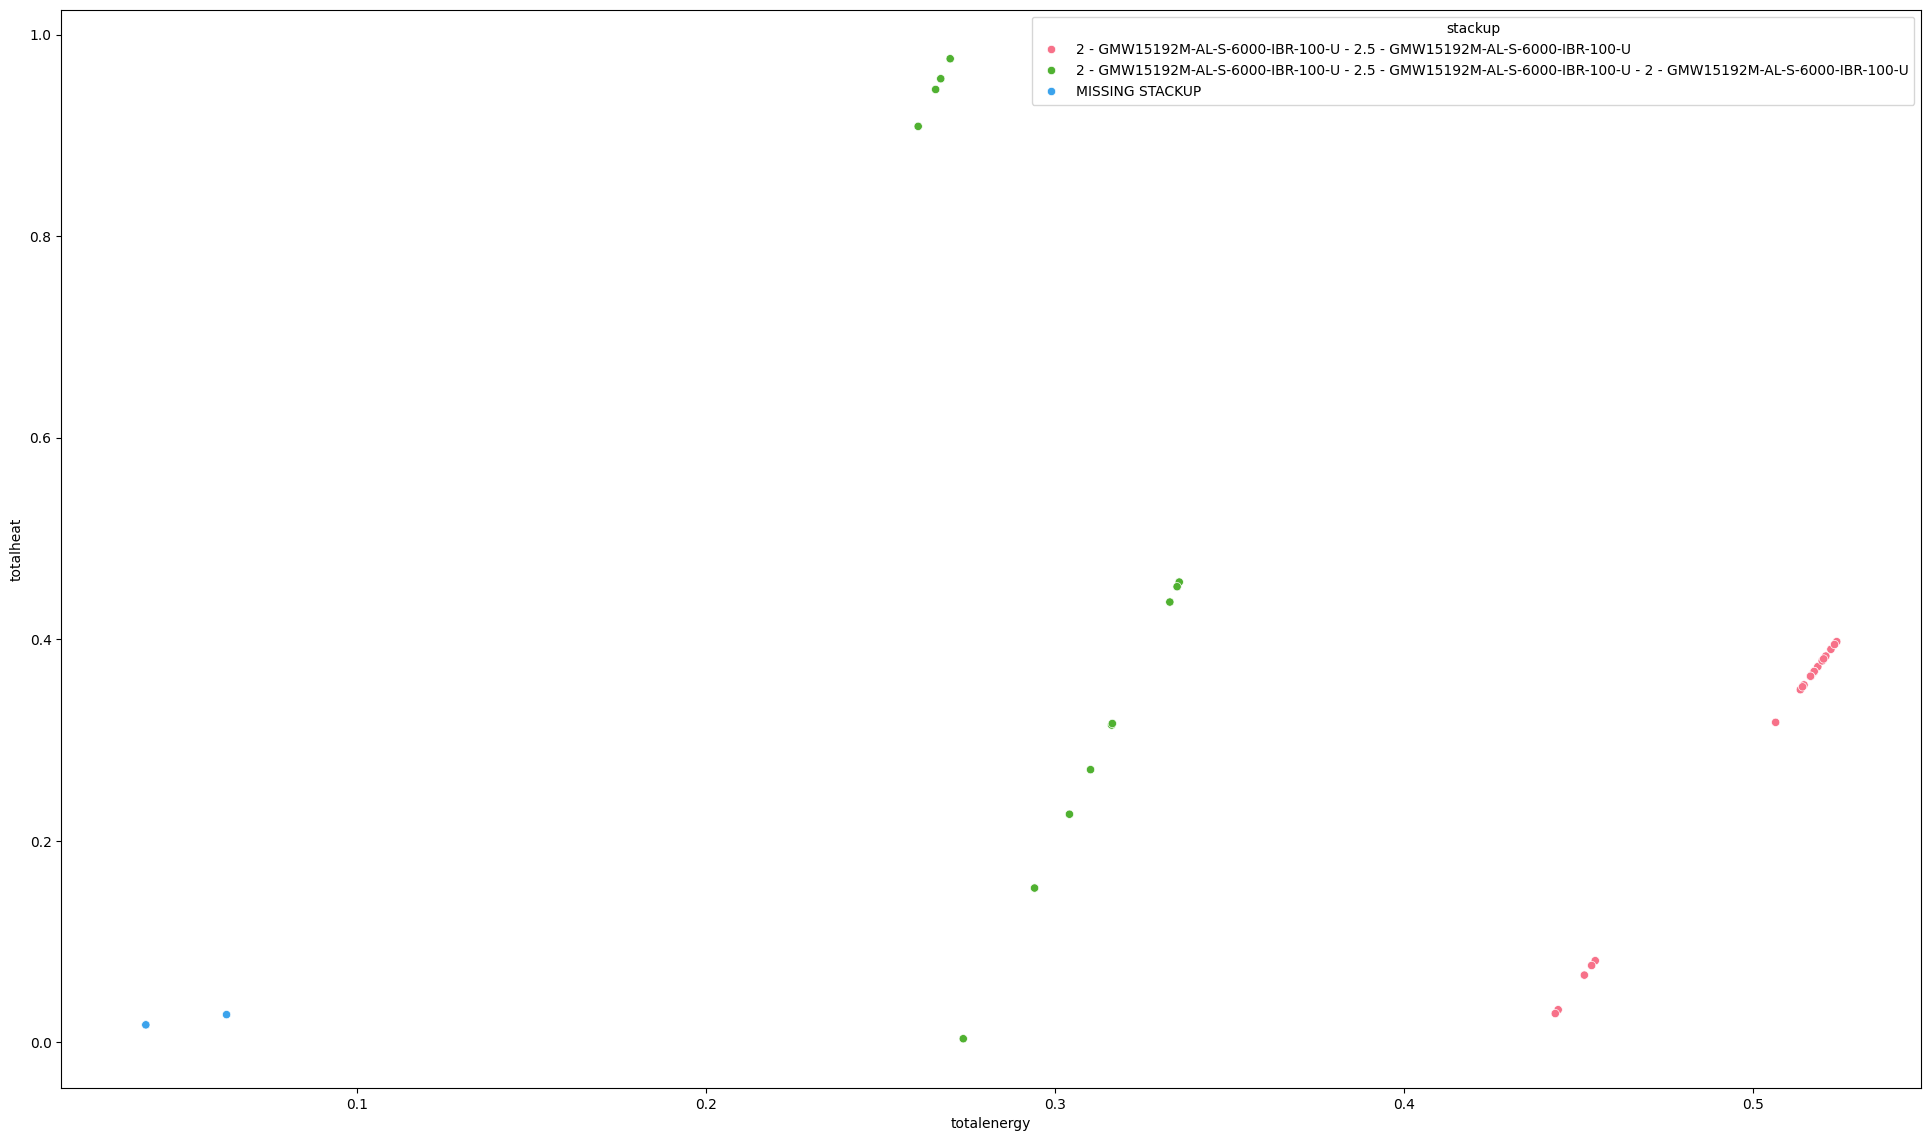

In [750]:
# Define isolation variable
variable = "stackup"

# Define o tamanho da figura e cria os eixos
fig, ax = plt.subplots(figsize=(24, 14))

# Define o intervalo de tempo desejado
start_date = '2024-03-28 00:21:00'
end_date = '2024-03-28 00:22:11'

# Filtra os dados dentro do intervalo de tempo especificado
sample_data_filtered = sample_data[(sample_data['timestamp_sm'] >= start_date) & (sample_data['timestamp_sm'] <= end_date)]
sample_data_filtered = sample_data_filtered[sample_data_filtered['stackup'] != 'EMPTY']

# Plota o gráfico de dispersão
sns.scatterplot(data=sample_data_filtered, x='totalenergy', y='totalheat', hue=variable, palette="husl", ax=ax)

# Adiciona tooltips aos pontos da imagem
mplcursors.cursor(hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f"Valor do pixel: {sel.artist.get_array()[sel.target.index]}")
)

# Mostra o gráfico
plt.show()

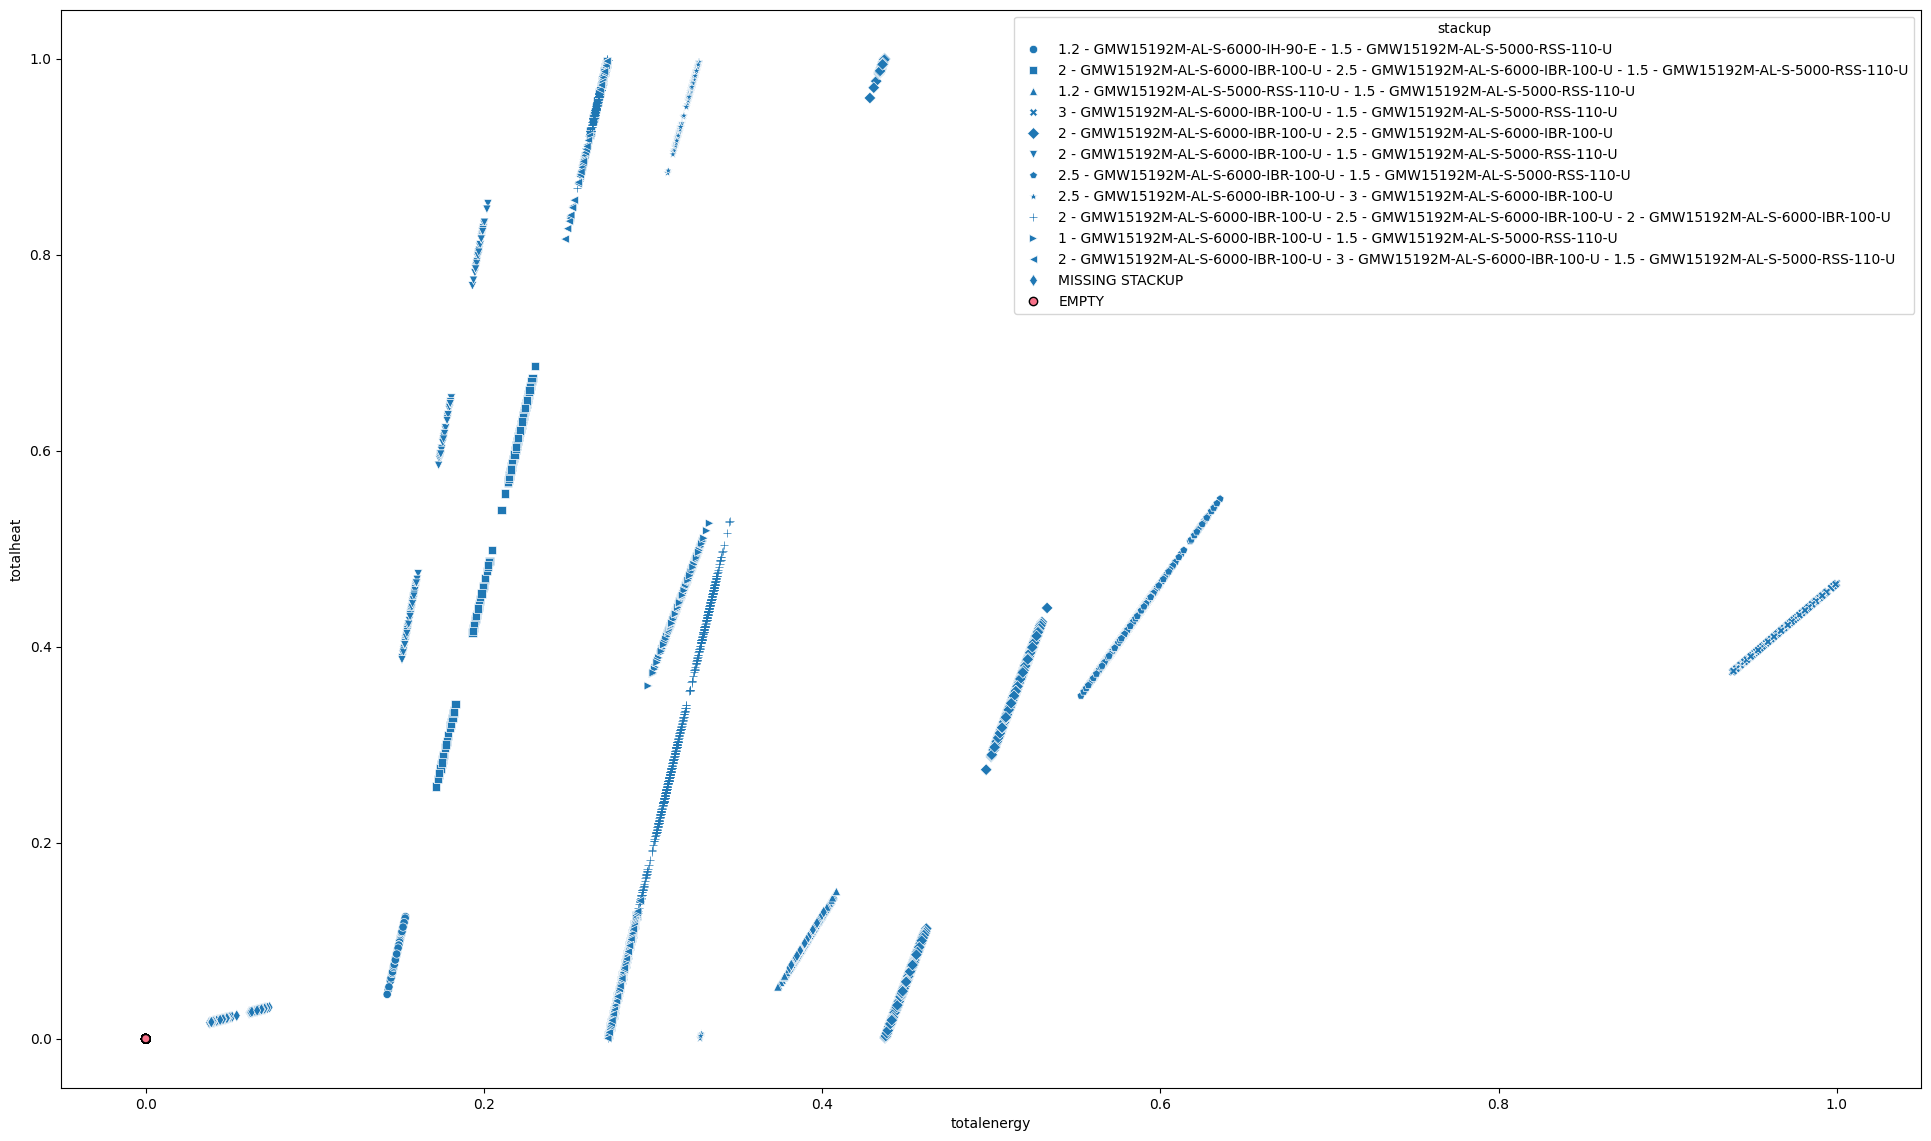

In [742]:
# Define isolation variable
variable = "stackup"

# Define os marcadores para cada tipo de stackup
marcadores_por_stackup = {
    '1.2 - GMW15192M-AL-S-6000-IH-90-E - 1.5 - GMW15192M-AL-S-5000-RSS-110-U': 'o',
    '2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW15192M-AL-S-5000-RSS-110-U': 's',
    '1.2 - GMW15192M-AL-S-5000-RSS-110-U - 1.5 - GMW15192M-AL-S-5000-RSS-110-U': '^',
    '3 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW15192M-AL-S-5000-RSS-110-U': 'X',
    '2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW15192M-AL-S-6000-IBR-100-U': 'D',
    '2 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW15192M-AL-S-5000-RSS-110-U': 'v',
    '2.5 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW15192M-AL-S-5000-RSS-110-U': 'p',
    '2.5 - GMW15192M-AL-S-6000-IBR-100-U - 3 - GMW15192M-AL-S-6000-IBR-100-U': '*',
    '2 - GMW15192M-AL-S-6000-IBR-100-U - 2.5 - GMW15192M-AL-S-6000-IBR-100-U - 2 - GMW15192M-AL-S-6000-IBR-100-U': '+',
    '1 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW15192M-AL-S-5000-RSS-110-U': '>',
    '2 - GMW15192M-AL-S-6000-IBR-100-U - 3 - GMW15192M-AL-S-6000-IBR-100-U - 1.5 - GMW15192M-AL-S-5000-RSS-110-U': '<',
    'MISSING STACKUP': 'd'
}

# Define o tamanho da figura e cria os eixos
fig, ax = plt.subplots(figsize=(24, 14))

# Plota o gráfico de dispersão com ícones diferentes para cada valor de stackup
for stackup, marker in marcadores_por_stackup.items():
    sample_data_stackup = sample_data[sample_data[variable] == stackup]
    sns.scatterplot(data=sample_data_stackup, x='totalenergy', y='totalheat', hue=variable, palette="tab10", style=variable, markers=[marker], ax=ax)

# Filtra o DataFrame para incluir apenas os dados das operações de fresagem
sample_data_highlighted = sample_data[(sample_data[variable].isin(['EMPTY'])) & (sample_data['stepnumber'] == '0')]

# Plota os pontos destacados
sns.scatterplot(data=sample_data_highlighted, x='totalenergy', y='totalheat', hue=variable, palette="husl", edgecolor='black', linewidth=1, ax=ax)

# Adiciona tooltips aos pontos da imagem
mplcursors.cursor(hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(f"Valor do pixel: {sel.artist.get_array()[sel.target.index]}")
)

# Mostra o gráfico
plt.show()


In [739]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8782 entries, 514 to 8408
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp_sm         8782 non-null   datetime64[ns]
 1   sequencenumber       8782 non-null   object        
 2   stepnumber           8782 non-null   object        
 3   spot_id              8782 non-null   string        
 4   stackup              8782 non-null   object        
 5   avgprimarycurrent    8782 non-null   float64       
 6   avgsecondarycurrent  8782 non-null   float64       
 7   avgresistance        8782 non-null   float64       
 8   avgsecvoltage        8782 non-null   float64       
 9   totalenergy          8782 non-null   float64       
 10  totalheat            8782 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(3), string(1)
memory usage: 823.3+ KB
